# <h1><center><span style="color:white">**Tugas Praktikum Pembelajaran Mesin Statistika**</span></center></h1>
# <h1><center><span style="color:white">**Statistical Machine Learning to Predict House Rent Cost of Airbnb Data**</span></center></h1>
# <center><span style='color:white'>`Muhammad Hasan Itqoni G1501221029`</span></center>
# <center><span style='color:white'>`Sofia Octaviana G1501221036` </span></center>
# <center><span style='color:white'>`Bayu Paramita G1501222052`</span></center>

# <left><span style='color:green'>I. Business Understanding</span></left>

### <left><span style='color:white'>Airbnb adalah situs web jasa penyewaan rumah milik pribadi yang memungkinkan pemilik ruamh untuk menyewakan properti untuk tamu yang mencari tempat tinggal. Airbnb menawarkan kebebasan penuh kepada pemilik rumah untuk memasang harga properti mereka. Kompetitif harga dan kualitas menjadi acuan para pemilik rumah untuk menarik calon penghuni. Pemilik rumah dapat memasukkan harga premium untuk fasilitas tambahan yang disediakan</span></left>
### <left><span style='color:white'>Maka dari itu pemilik rumah harus memberikan harga sewa yang kompetitif yang sesuai dengan jenis property yang mereka sewakan. Pada analisis ini akan dibangun model pembelajaran mesin statistika dalam memprediksi harga sewa rumah sesuai dengan spesifikasi rumah yang ditawarkan oleh pemilik rumah'</span></left>

# <left><span style='color:green'>II. Import library</span></left>

In [147]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.4)

from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from statsmodels.api import OLS, add_constant
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, \
                                accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
                                
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as mse

# <left><span style='color:green'>III. Import Data (Train and Test)</span></left>

In [442]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# <left><span style='color:green'>IV. Explore Data Train</span></left>

In [324]:
airbnb = train_df.copy()
airbnb.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price
0,6901257,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,150.0
1,6304928,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,169.0
2,7919400,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,145.0
3,13418779,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,750.0
4,3808709,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,115.0


In [325]:
airbnb.columns

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'price'],
      dtype='object')

In [326]:
airbnb.shape

(51879, 29)

Data train terdiri dari 51879 observasi dan 28 variabel

In [327]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51879 entries, 0 to 51878
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      51879 non-null  int64  
 1   property_type           51879 non-null  object 
 2   room_type               51879 non-null  object 
 3   amenities               51879 non-null  object 
 4   accommodates            51879 non-null  int64  
 5   bathrooms               51735 non-null  float64
 6   bed_type                51879 non-null  object 
 7   cancellation_policy     51879 non-null  object 
 8   cleaning_fee            51879 non-null  bool   
 9   city                    51879 non-null  object 
 10  description             51879 non-null  object 
 11  first_review            40865 non-null  object 
 12  host_has_profile_pic    51751 non-null  object 
 13  host_identity_verified  51751 non-null  object 
 14  host_response_rate      39125 non-null

Pada beberapa variabel masih terdapat data hilang / missing value, maka harus dilakukan penanganan

Melihat statistika 5 serangkai variabel yang bertipe numerik

In [328]:
airbnb.describe().round().T

,count,mean,std,min,25%,50%,75%,max
id,51879.0,11288025.0,6083036.0,941.0,6297405.0,12282255.0,16405802.0,21228356.0
accommodates,51879.0,3.0,2.0,1.0,2.0,2.0,4.0,16.0
bathrooms,51735.0,1.0,1.0,0.0,1.0,1.0,1.0,8.0
latitude,51879.0,38.0,3.0,33.0,34.0,41.0,41.0,42.0
longitude,51879.0,-92.0,22.0,-123.0,-118.0,-77.0,-74.0,-71.0
number_of_reviews,51879.0,21.0,37.0,0.0,1.0,6.0,23.0,605.0
review_scores_rating,40258.0,94.0,8.0,20.0,92.0,96.0,100.0,100.0
bedrooms,51813.0,1.0,1.0,0.0,1.0,1.0,1.0,10.0
beds,51795.0,2.0,1.0,0.0,1.0,1.0,2.0,18.0
price,51879.0,160.0,169.0,1.0,75.0,111.0,185.0,1999.0


Mentranformasi variabel respon yaitu price menjadi bentuk logaritmik karena dapat dilihat pada tabel di atas bahwa satuan nilai variabel price berbeda cukup jauh yaitu nilai minimal 1 dan maksimal 1.999

In [329]:
airbnb["log_price"]= np.log(airbnb.price)

In [330]:
airbnb.describe().round().T

,count,mean,std,min,25%,50%,75%,max
id,51879.0,11288025.0,6083036.0,941.0,6297405.0,12282255.0,16405802.0,21228356.0
accommodates,51879.0,3.0,2.0,1.0,2.0,2.0,4.0,16.0
bathrooms,51735.0,1.0,1.0,0.0,1.0,1.0,1.0,8.0
latitude,51879.0,38.0,3.0,33.0,34.0,41.0,41.0,42.0
longitude,51879.0,-92.0,22.0,-123.0,-118.0,-77.0,-74.0,-71.0
number_of_reviews,51879.0,21.0,37.0,0.0,1.0,6.0,23.0,605.0
review_scores_rating,40258.0,94.0,8.0,20.0,92.0,96.0,100.0,100.0
bedrooms,51813.0,1.0,1.0,0.0,1.0,1.0,1.0,10.0
beds,51795.0,2.0,1.0,0.0,1.0,1.0,2.0,18.0
price,51879.0,160.0,169.0,1.0,75.0,111.0,185.0,1999.0


#### <left><span style='color:yellow'>Log Price</span></left>

Mean app log_price = 4.78
Median app log_price = 4.71


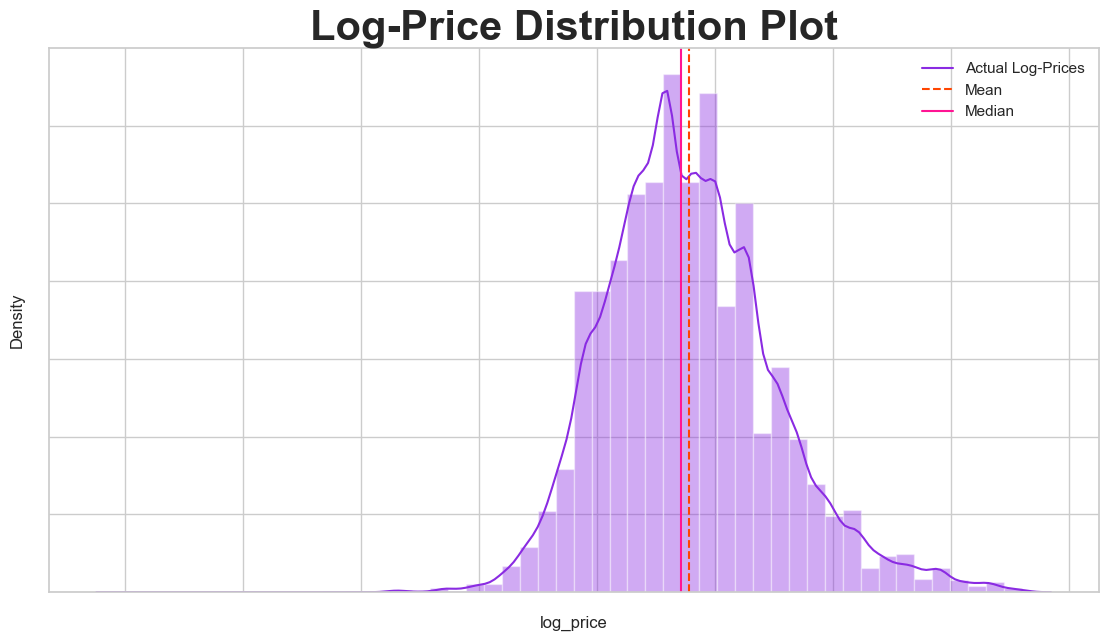

In [331]:
# Average and median rating of apps
mean = round(airbnb['log_price'].mean(), 2)
median = round(airbnb['log_price'].median(), 2)

print(f'Mean app log_price = {mean}', f'Median app log_price = {median}',sep= '\n')

my_colors = ['royalblue','seagreen', 'salmon','y','blueviolet','orangered' ,
                 'olive','deeppink', 'purple', 'gold', 'cyan' ]

fig = plt.figure(figsize=(16,14))
# Distribution of apps according to their ratings
sns.set_theme()
sns.set_style("whitegrid")
price_hist = sns.distplot(airbnb["log_price"], kde = True,  color=my_colors[4])

price_hist.axvline(mean, color=my_colors[5], linestyle='--')
price_hist.axvline(median, color=my_colors[7], linestyle='-')
plt.legend({'Actual Log-Prices': price_hist, 'Mean':mean,'Median':median})
plt.gcf().set_size_inches( 15, 8)
plt.title("Log-Price Distribution Plot",size=30, weight='bold')
price_hist.set_xticklabels(price_hist.get_xmajorticklabels(), fontsize = 16)
price_hist.set_yticklabels(price_hist.get_ymajorticklabels(), fontsize = 16)
plt.subplots_adjust(left=0.2, bottom=0.2)

fig.savefig('img/price_distribution_2.png')

Setelah dilakukan transformasi dalam bentuk log, variabel log_price menyebar normal dengan nilai mean = 4.78

In [332]:
airbnb.head(1)

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price,log_price
0,6901257,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,150.0,5.010635


Pada tabel di atas, dapat dilihat bahwa tipe data variabel penjelas berbeda, yaitu integer, object, dan logical/boolean.

Melihat variabel penjelas kontinu

In [333]:
for col in airbnb.select_dtypes(include='number').columns:
    print(col)
    

id
accommodates
bathrooms
latitude
longitude
number_of_reviews
review_scores_rating
bedrooms
beds
price
log_price


#### <left><span style='color:yellow'>Correlation</span></left>

Untuk melihat pola hubungan linear antara variabel penjelas, maka dicari korelasinya yang disajikan dalam bentuk matriks.

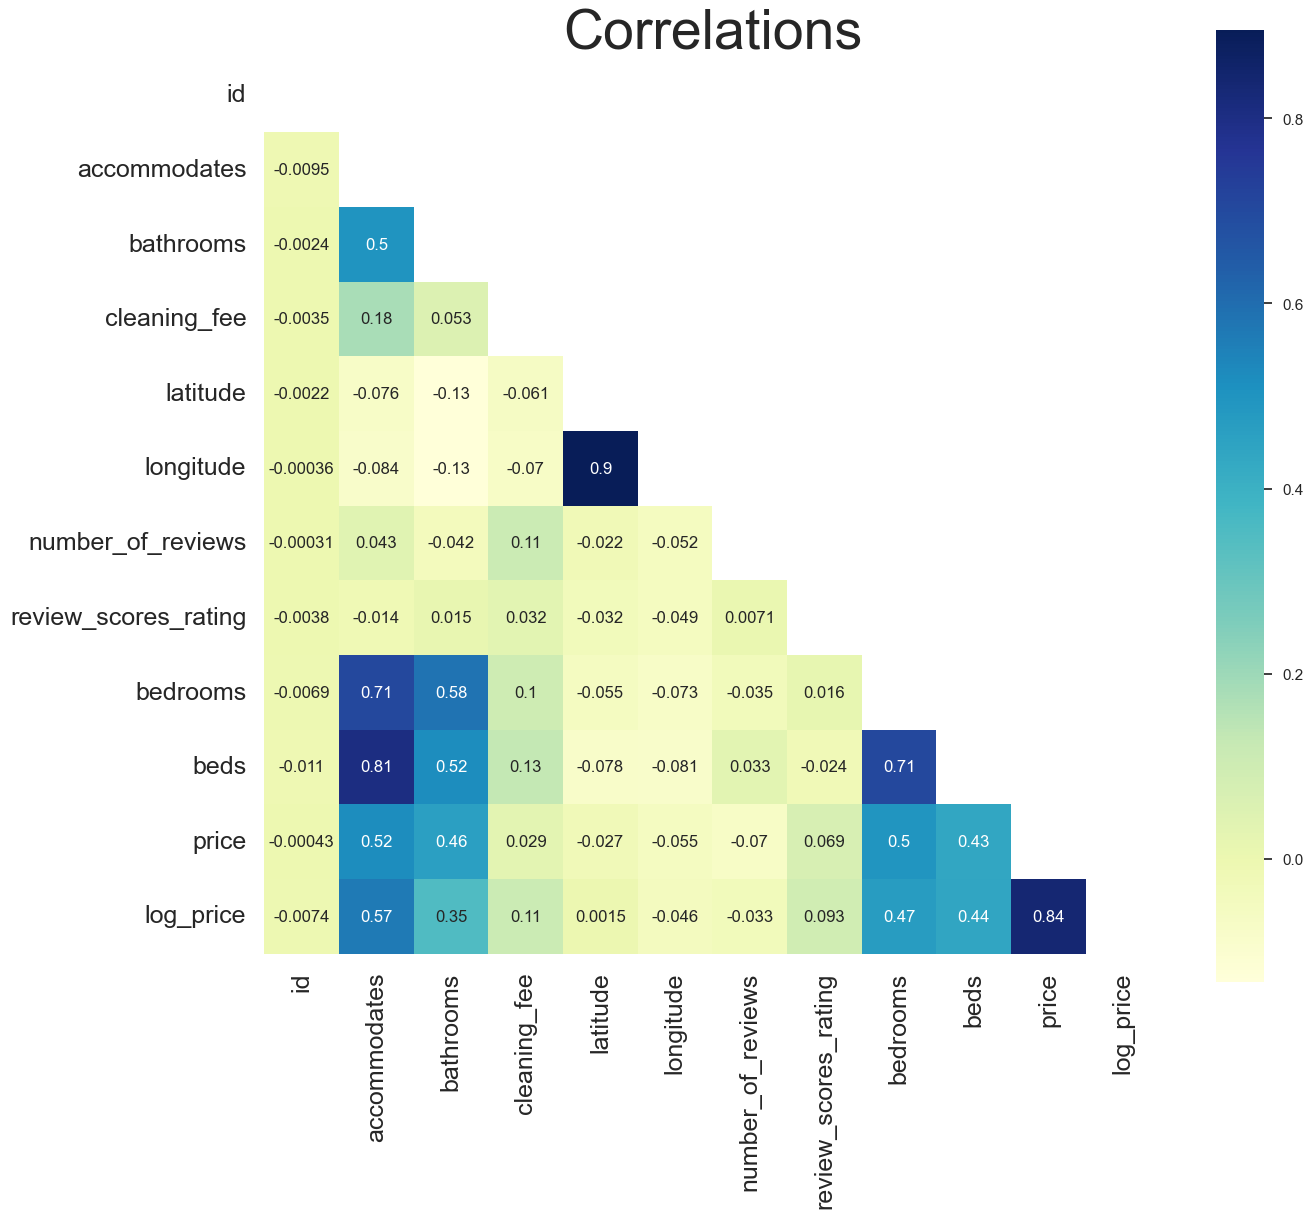

In [334]:
fig = plt.figure(figsize=(16,14))

corr = airbnb.corr() # Compute the correlation matrix

mask = np.triu(np.ones_like(corr, dtype=bool)) # Generate a mask for the upper triangle
ax = sns.heatmap(corr, mask=mask, cmap='YlGnBu', annot=True, square=True, annot_kws={"size": 12})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
plt.title('Correlations', fontsize = 40)
plt.subplots_adjust(left=0.2, bottom=0.2)
fig.savefig('img/correlations.png', transparent=True, api=100)

Pada matriks korelasi di atas, dapat dilihat bahwa terdapat hubungan linear antara variabel price dengan variabel accomodates, bathrooms, review_scores_rating, bedrooms, dan beds.

#### <left><span style='color:yellow'>City vs Price</span></left>

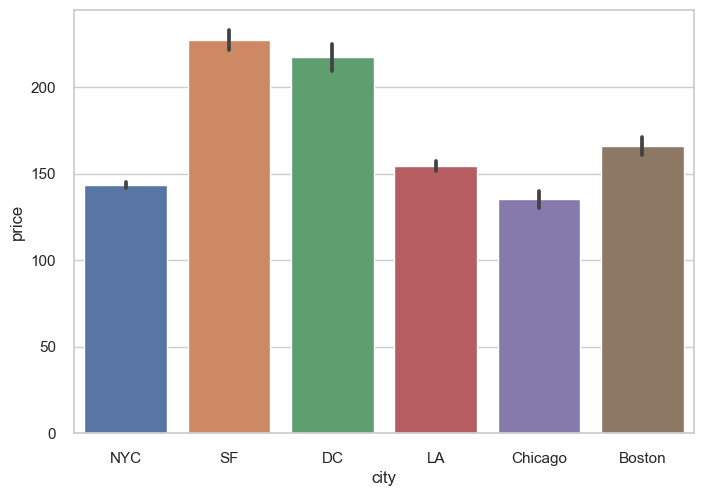

In [335]:
plot1 = sns.barplot(x='city',y='price',data=airbnb)
fig = plot1.get_figure()
fig.savefig('./plot1.png')

Pada barplot di atas, dapat dilihat bahwa harga penyewaan rumah termahal terdapat di kota San Francisco dan Washington DC serta harga sewa termurah terdapat di kota Chicago.

#### <left><span style='color:yellow'>Price vs City + Property type</span></left>

In [336]:
airbnb.pivot_table(values='price',index='property_type',columns='city')

city,Boston,Chicago,DC,LA,NYC,SF
property_type,,,,,,
Apartment,168.671932,124.060137,196.026815,122.946951,140.624844,215.653846
Bed & Breakfast,104.500000,117.125000,143.727273,106.891156,121.231884,143.166667
Boat,427.333333,352.500000,89.500000,184.650000,125.200000,192.500000
Boutique hotel,NaN,211.142857,135.666667,105.000000,288.083333,221.130435
Bungalow,NaN,49.000000,70.000000,135.936441,165.555556,220.666667
Cabin,NaN,NaN,110.000000,113.162791,250.000000,155.666667
Camper/RV,NaN,NaN,NaN,142.339286,NaN,149.428571
Casa particular,NaN,NaN,NaN,80.000000,NaN,NaN
Castle,NaN,NaN,199.000000,304.166667,NaN,270.000000


Pada tabel di atas dapat dilihat bahwa variasi type properti terbanyak ada di kota Los Angeles dan variasi terendah ada pada kota Boston dan Chicago.

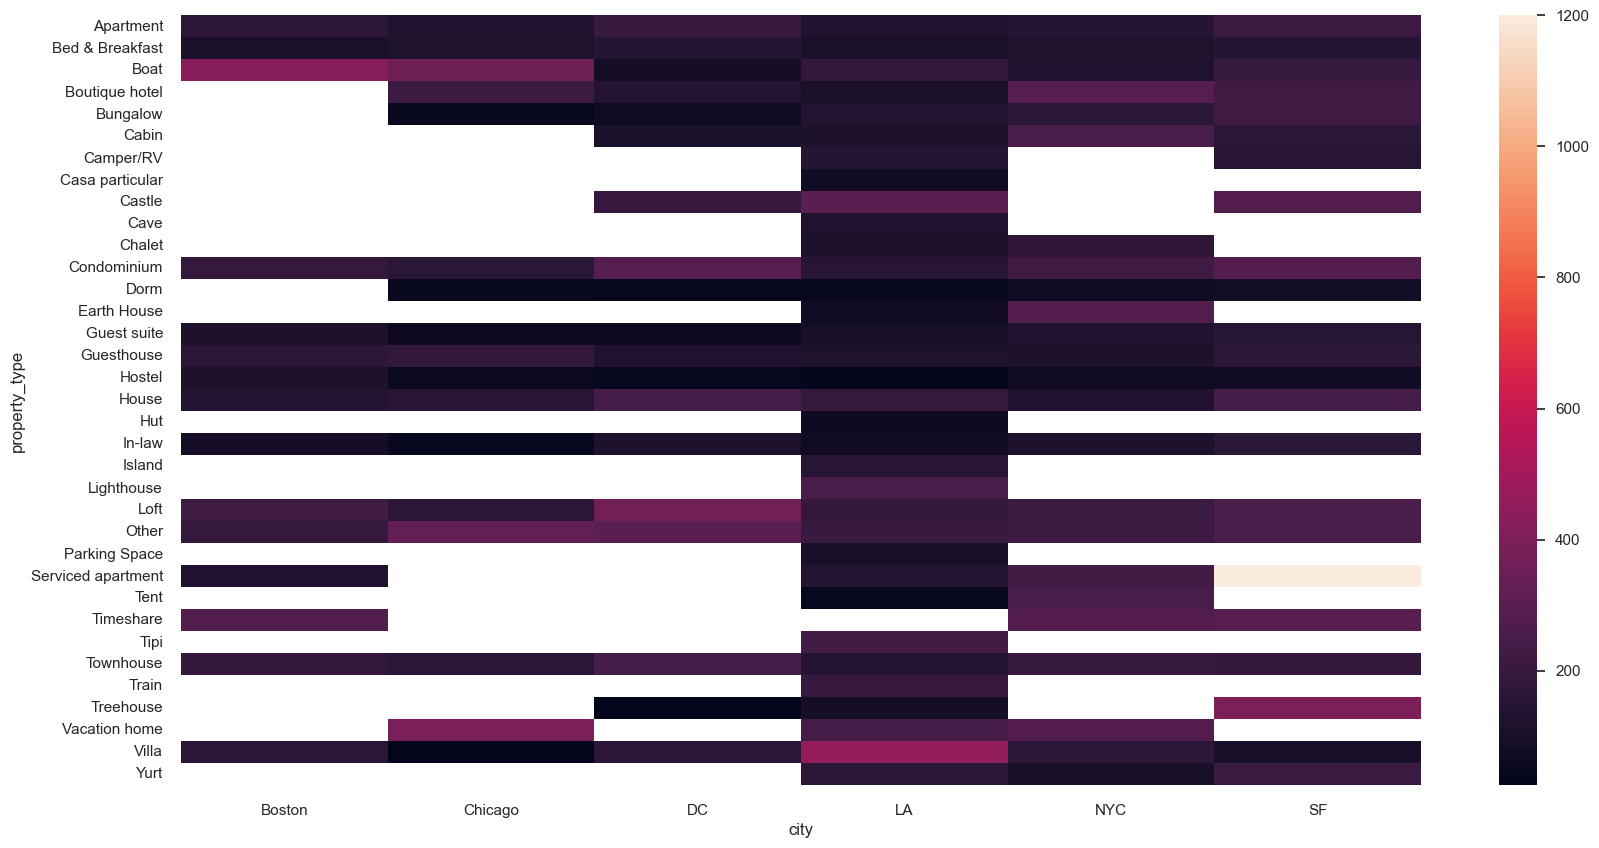

In [337]:
plt.figure(figsize=(20,10))
pivot_df = airbnb.pivot_table(values='price',index='property_type',columns='city')
plot2 = sns.heatmap(pivot_df)
fig = plot2.get_figure()
fig.savefig('./plot2.png')

#### <left><span style='color:yellow'>Price vs Accomodates + Property type</span></left>

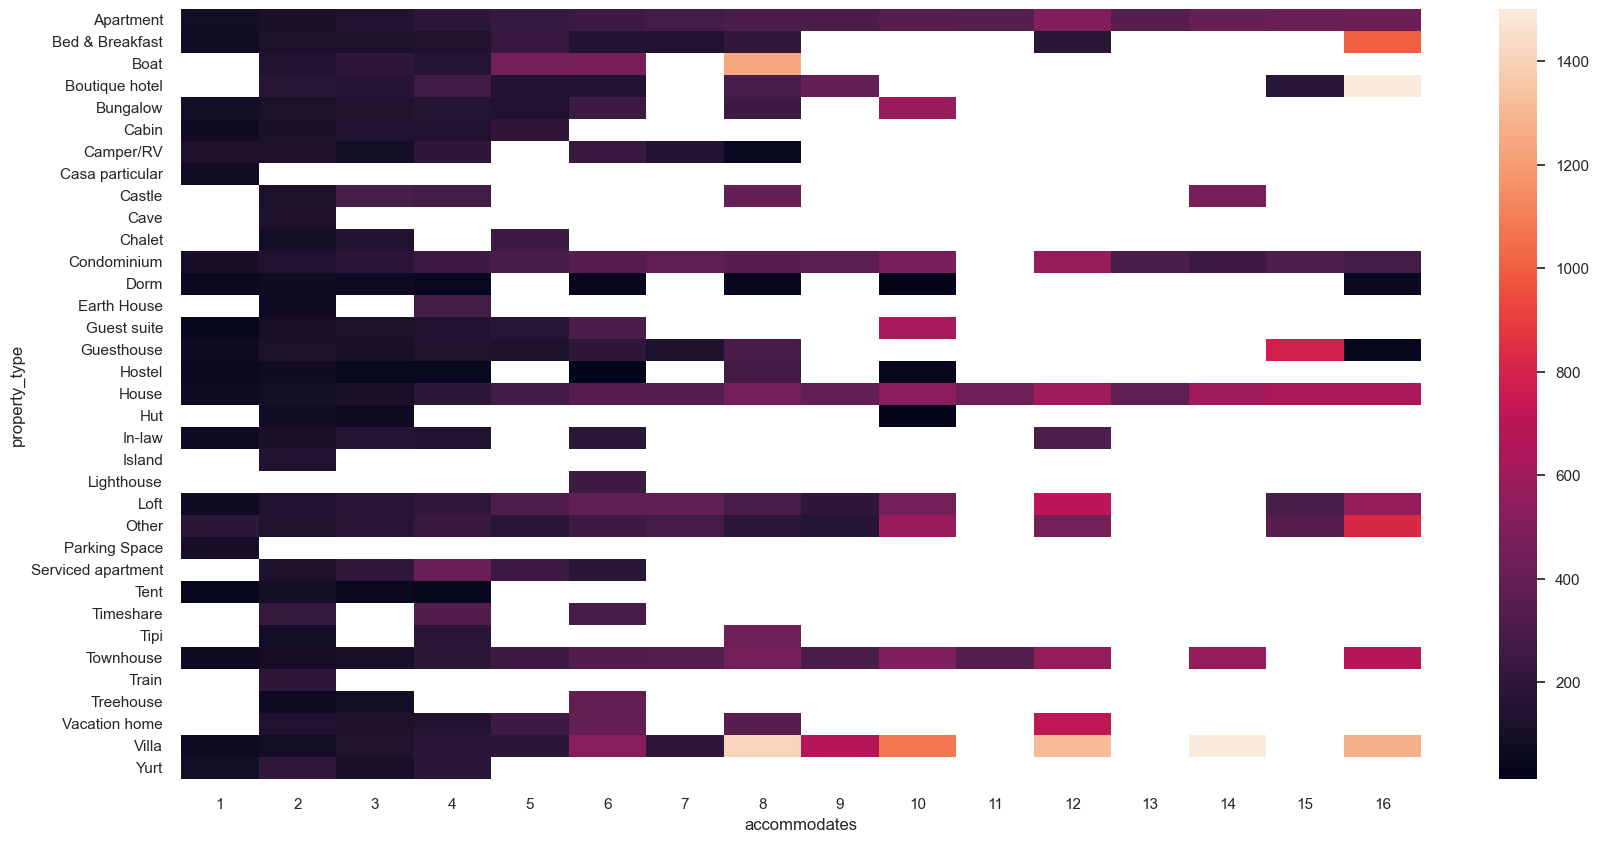

In [338]:
plt.figure(figsize=(20,10))
pivot_df = airbnb.pivot_table(values='price',index='property_type',columns='accommodates')
plot3 = sns.heatmap(pivot_df)
fig = plot3.get_figure()
fig.savefig('./plot3.png')

Pada Heatmap di atas, dapat dilihat bahwa semakin tinggi accomodates maka cenderung mahal harga sewa penginapannya. 

In [339]:
expencive_neighbours = airbnb.groupby('neighbourhood')['price'].mean().reset_index()
neighbour_df = expencive_neighbours.sort_values(by = 'price', ascending = False).head(10)
neighbour_df['city'] = airbnb.city

neighbour_df


,neighbourhood,price,city
587,Wilmington,1300.000000,NYC
99,"Chevy Chase, MD",1250.000000,NYC
43,Bellevue,887.500000,NYC
398,Observatory Circle,825.000000,NYC
463,Sea Cliff,797.000000,NYC
475,Skyland,662.500000,SF
61,Bradbury,633.500000,NYC
319,Malibu,519.029630,NYC
345,Mill Basin,500.000000,SF
42,Bel Air/Beverly Crest,486.505882,NYC


<Figure size 1800x800 with 0 Axes>

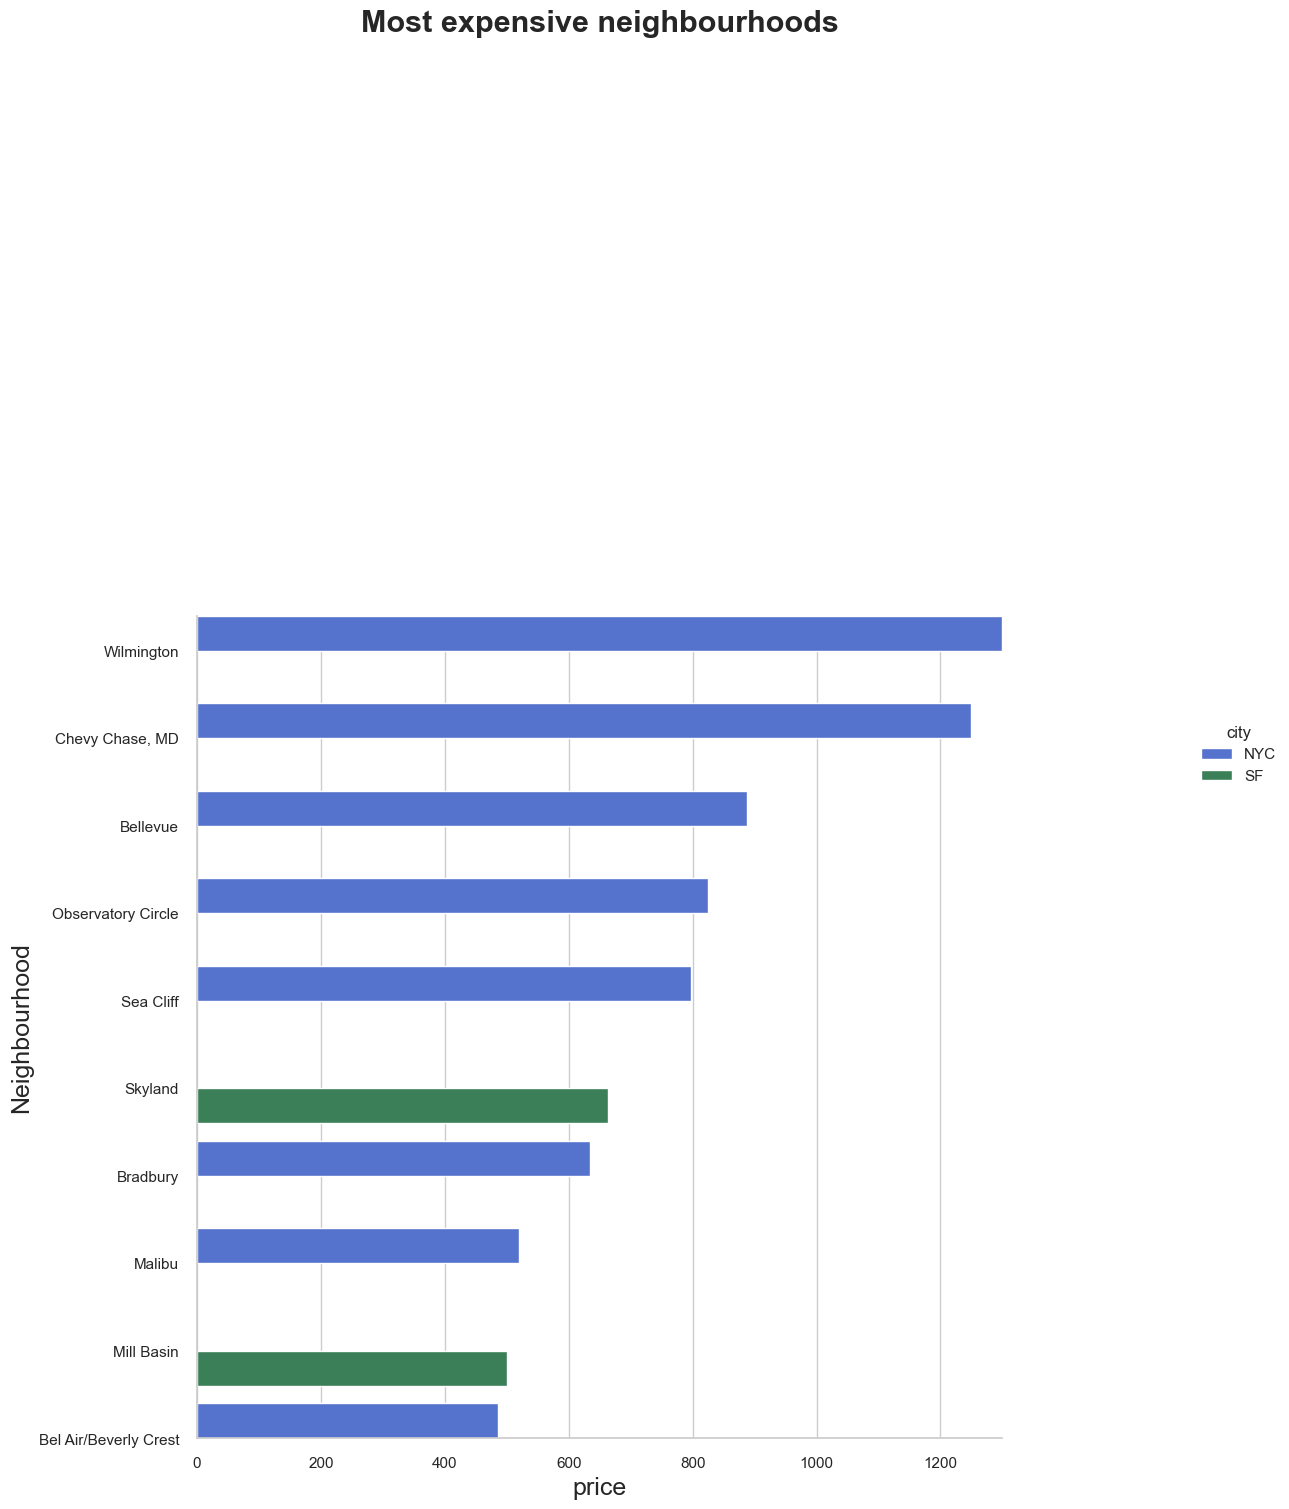

In [340]:
fig = plt.figure(figsize=(18,8))
sns.set_theme()
sns.set_style("whitegrid")


ax3 = sns.catplot(x = 'price' , y = 'neighbourhood' ,  kind='bar', data = neighbour_df, hue='city',palette=my_colors )
plt.title("Most expensive neighbourhoods",size=22, weight='bold', y=1.7)
# Set label for x-axis
plt.xlabel( "price" , size = 18 )
# Set label for y-axis
plt.ylabel( "Neighbourhood" , size = 18 )

ax3.fig.set_figwidth(18)
ax3.fig.set_figheight(10)

plt.margins(0,0)

ax3.fig.savefig('img/expensive_neighbours.png',pad_inches = 0, bbox_inches='tight')

Pada tabel dan barplot di atas, dapat dilihat bahwa harga sewa penginapan yang paling mahal yaitu di kota Newyork City dimana lokasi penginapan tersebut bertetangga dengan Wilmington.

#### <left><span style='color:yellow'>Rent House vs City</span></left>

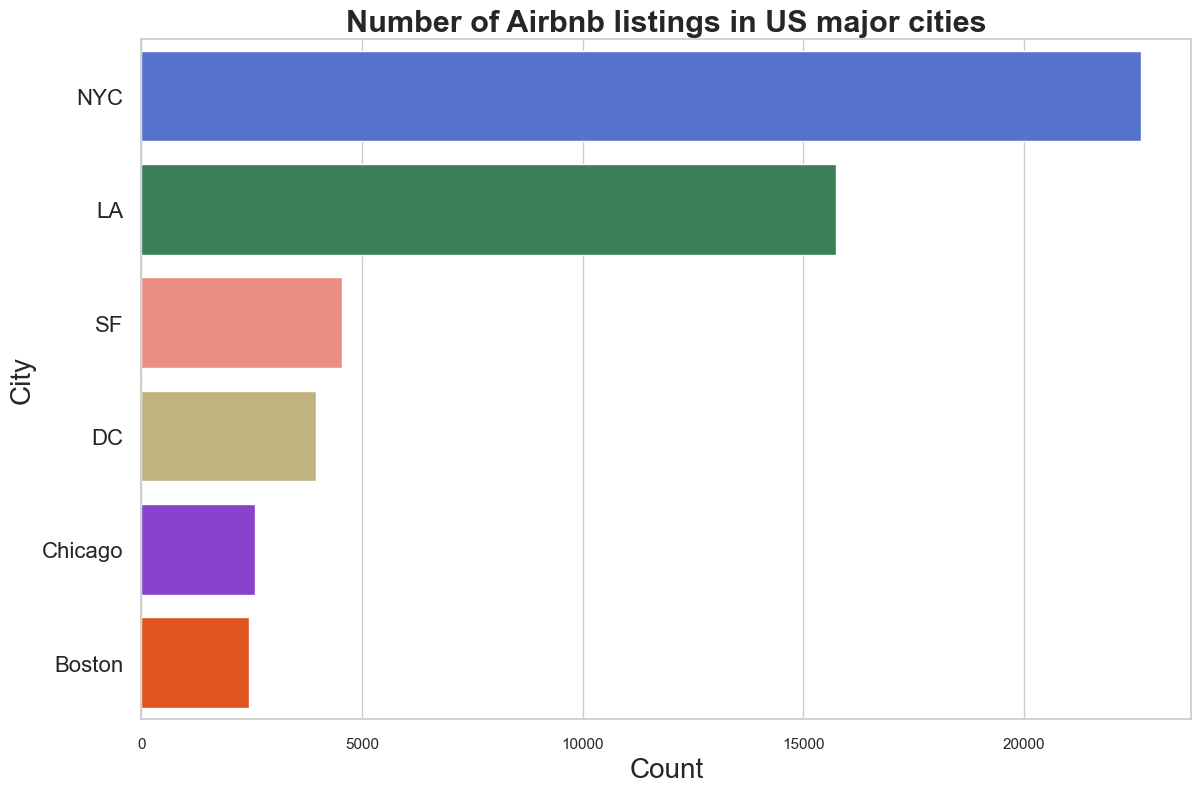

In [341]:
fig = plt.figure(figsize=(15,10))
sns.set_theme()
sns.set_style("whitegrid")
sns.color_palette("bright")

ax1 = sns.countplot( y = 'city' , data = airbnb,
                        order=airbnb['city'].value_counts().index, palette=my_colors )

#ax1.set(xlabel='Count', ylabel='City')
ax1.set_xlabel("Count",fontsize=20)
ax1.set_ylabel("City",fontsize=20)

plt.title("Number of Airbnb listings in US major cities",size=22, weight='bold')
#ax1.set_xticklabels(ax1.get_xmajorticklabels(), fontsize = 12)
ax1.set_yticklabels(ax1.get_ymajorticklabels(), fontsize = 16)
plt.subplots_adjust(left=0.2, bottom=0.2)

fig.savefig('img/city_2.png')

Pada tabel grafik di atas, dapat dilihat bahwa jumlah penginapan terbanyak yaitu di Kota Newyork City dan terendah di Kota Boston.

#### <left><span style='color:yellow'>Accomodates vs Price</span></left>

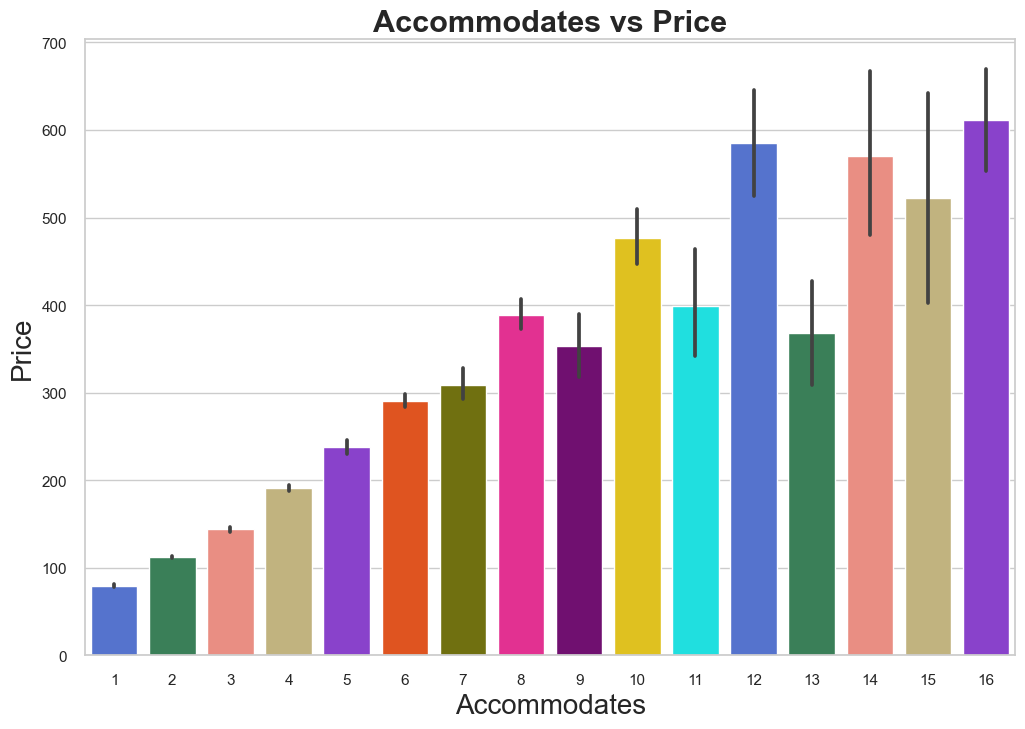

In [342]:
fig = plt.figure(figsize=(12,8))
sns.set_theme()
sns.set_style("whitegrid")
sns.color_palette("bright")

ax1 = sns.barplot( x = 'accommodates', y = np.exp(airbnb.log_price).round() , data = airbnb,
                                                             palette=my_colors )

ax1.set_title('Accommodates vs Price')
plt.title("Accommodates vs Price",size=22, weight='bold')

#ax1.set(xlabel='Accommodates', ylabel='Price')
ax1.set_xlabel("Accommodates",fontsize=20)
ax1.set_ylabel("Price",fontsize=20)

#ax1.set_xticklabels(ax1.get_xmajorticklabels(), fontsize = 18)
#ax1.set_yticklabels(ax1.get_ymajorticklabels(), fontsize = 18)

fig.savefig('img/Accommodates_2.png')

Dapat dilihat bahwa semakin tinggi Accomodates, maka cenderung semakin tinggi harga sewa penginapannya.

# <left><span style='color:green'>V. Pra-Process Data (Train and Test)</span></left>

### <left><span style='color:orange'>Train</span></left>

#### <left><span style='color:yellow'>Missing Value</span></left>

In [343]:
missing_cols = airbnb.isnull().sum(axis=0).reset_index()
missing_cols.columns = ['column_name', 'missing_count']
missing_cols = missing_cols.loc[missing_cols['missing_count']>0]
missing_cols = missing_cols.sort_values(by='missing_count',ascending=False)
missing_cols

,column_name,missing_count
14,host_response_rate,12754
23,review_scores_rating,11621
11,first_review,11014
17,last_review,10989
24,thumbnail_url,5765
21,neighbourhood,4774
25,zipcode,670
5,bathrooms,144
12,host_has_profile_pic,128
13,host_identity_verified,128


Pada variabel host_response_rate dan review_score_rating terdapat data hilang, maka diisi dengan 0 dan merubahnya menjadi format numerik

In [344]:
# host_response_rate
airbnb['host_response_rate'] = airbnb['host_response_rate'].apply(lambda col: float(str(col).replace("%", "")))
airbnb['host_response_rate'] = airbnb['host_response_rate'].fillna(0)
airbnb['host_response_rate'] = pd.to_numeric(airbnb['host_response_rate'])
# review_scores_rating
airbnb['review_scores_rating'] = airbnb['review_scores_rating'].fillna(0)
# variabel numerik lainnya
airbnb[['first_review', 'host_response_rate',
        'last_review', 'latitude', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds']][airbnb.first_review.isna()]

,first_review,host_response_rate,last_review,latitude,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
3,NaN,0.0,NaN,37.772004,0,0.0,94117.0,2.0,2.0
11,NaN,0.0,NaN,33.813228,0,0.0,90277,1.0,1.0
25,NaN,83.0,NaN,34.064077,0,0.0,90036,1.0,1.0
33,NaN,100.0,NaN,41.861057,0,0.0,60605,2.0,2.0
34,NaN,0.0,NaN,34.107803,0,0.0,90068,1.0,1.0
...,...,...,...,...,...,...,...,...,...
51856,NaN,0.0,NaN,40.704549,0,0.0,11237.0,0.0,1.0
51857,NaN,0.0,NaN,37.801916,0,0.0,NaN,1.0,1.0
51863,NaN,0.0,NaN,34.185699,0,0.0,91001,1.0,1.0
51867,NaN,0.0,NaN,40.617641,0,0.0,11209,1.0,1.0


Setelah dilakukan imputasi dengan angka nol dan dijadikan numerik sudah tidak ada missing value pada variabel host_response_rate dan review_scores_rating, namun masih banyak terdapat NaN pada variabel lainnya.

Pada variabel yang masih terdapat NaN, maka dirubah menjadi 0

In [345]:
# 'last_review'
airbnb['last_review'] = airbnb['last_review'].fillna('00-00-00')
# 'first_review'
airbnb['first_review'] = airbnb['first_review'].fillna('00-00-00')
# 'host_since'
airbnb['host_since'] = airbnb['host_since'].fillna('00-00-00')
# 'bathrooms'
airbnb['bathrooms'] = airbnb['bathrooms'].fillna(0)
# 'bedrooms'
airbnb['bedrooms'] = airbnb['bedrooms'].fillna(0)
# 'beds' 
airbnb['beds'] = airbnb['beds'].fillna(0)
# 'neighbourhood'
airbnb.neighbourhood.fillna('Unknown',inplace=True)
# 'thumbnai_url'
airbnb.thumbnail_url.fillna('Unknown',inplace=True)

variabel host_has_profile_pic dan host_identity_verified berbentuk object dengan array 't', 'f', dan NaN. Maka dilakukan transformasi variabel tersebut menjadi boolean (0,1)

In [346]:
airbnb.host_has_profile_pic.unique()

array(['t', nan, 'f'], dtype=object)

In [347]:
airbnb.host_identity_verified.unique()

array(['t', 'f', nan], dtype=object)

In [348]:
# 'host_has_profile_pic'
airbnb.loc[airbnb.host_has_profile_pic == 't', 'host_has_profile_pic'] = 1
airbnb.loc[airbnb.host_has_profile_pic == 'f', 'host_has_profile_pic'] = 0
airbnb['host_has_profile_pic'] = airbnb['host_has_profile_pic'].fillna(0)

# 'host_identity_verified'
airbnb.loc[airbnb.host_identity_verified == 't', 'host_identity_verified'] = 1
airbnb.loc[airbnb.host_identity_verified == 'f', 'host_identity_verified'] = 0
airbnb['host_identity_verified'] = airbnb['host_identity_verified'].fillna(0)

#### <left><span style='color:yellow'>Drop Irrelevant Variable</span></left>

In [349]:
airbnb.drop(['price','id','name','description', 'thumbnail_url', 'latitude','longitude','zipcode','first_review', 'last_review','neighbourhood'], axis = 1, inplace=True)
airbnb.drop([], axis = 1, inplace=True)

#### <left><span style='color:yellow'>Categoric Variable</span></left>

Pada tahap ini, dilakukan penanganan pada variabel yang bertipe kategorik. Terdapat beberapa tipe seperti date, boolean, url, array, dan currency.

In [350]:
categorical_attributes = ['city', 'property_type', 'room_type', 
                          'bed_type','accommodates', 'cancellation_policy']

In [351]:
# instant_bookable types are replaced with 0 or 1
airbnb.loc[airbnb.instant_bookable == 't', 'instant_bookable'] = 1
airbnb.loc[airbnb.instant_bookable == 'f', 'instant_bookable'] = 0

# Date types are factorized into numerical ints
airbnb['host_since_rank'] = airbnb['host_since'].rank(method='dense').astype(int)
airbnb.drop(['host_since'], axis = 1, inplace=True)

Membuat frekuensi pada variabel amenities

In [352]:
airbnb['amenities'].shape

(51879,)

In [353]:
# Arrays are a little complicated. First, we remove the extraneous characters in them
def get_arr(l):
    l = l.replace('[', '');
    l = l.replace(']', '');
    l = l.replace('{', '');
    l = l.replace('}', '');
    l = l.replace("'", '');
    l = l.replace('"', '');
    return l;
airbnb['amenities_words'] = airbnb['amenities'].map(lambda x: get_arr(x))

In [354]:
amentie_counts = dict()
array = airbnb['amenities_words']
for arr in array:
    for w in arr.split(','):
        if w.strip() not in amentie_counts.keys():
            amentie_counts[w.strip()] = 0
        amentie_counts[w.strip()] += arr.count(w.strip())

def getFrequency(text):
    frec = 0
    for w in text.split(','):
        frec+=text.count(w.strip())/amentie_counts[w.strip()]
    return frec

airbnb['amenities_frequency'] = airbnb['amenities_words'].map(lambda x: getFrequency(x))
airbnb.drop(['amenities_words'],axis=1,inplace=True)
airbnb.drop(['amenities'], axis = 1, inplace=True)

airbnb['amenities_frequency']

0        0.000273
1        0.000467
2        0.000817
3        0.000671
4        0.000511
           ...   
51874    0.001961
51875    0.000550
51876    0.004707
51877    0.000407
51878    0.000710
Name: amenities_frequency, Length: 51879, dtype: float64

Merubah variabel cleaning_fee dan instant_bookable menjadi numerik

In [355]:
airbnb.cleaning_fee = airbnb.cleaning_fee.astype(int)
airbnb.instant_bookable = airbnb.instant_bookable.astype(int)

Variabel property_type terdapat beberapa kategori, maka dari itu dibuat 5 kategori dan melabelkan kategori lainnya menjadi other label

In [356]:
# Dividing the dataset into the top5 and the rest
proptype_keep = airbnb.property_type.value_counts()[:5].index.to_list()
proptypey_remove = airbnb.property_type.value_counts()[5:].index.to_list()

#Set as 'Other' every country out of the top10 using np.where
airbnb.property_type = np.where(airbnb.property_type.isin(proptypey_remove),'OTHER_prop_type',airbnb.property_type)

In [357]:
airbnb.head()

,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,log_price,host_since_rank,amenities_frequency
0,Apartment,Entire home/apt,3,1.0,Real Bed,strict,1,NYC,1,1,0.0,0,2,100.0,1.0,1.0,5.010635,1010,0.000273
1,Apartment,Entire home/apt,7,1.0,Real Bed,strict,1,NYC,1,0,100.0,1,6,93.0,3.0,3.0,5.129899,2921,0.000467
2,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,1,NYC,1,1,100.0,1,10,92.0,1.0,3.0,4.976734,2684,0.000817
3,House,Entire home/apt,4,1.0,Real Bed,flexible,1,SF,1,1,0.0,0,0,0.0,2.0,2.0,6.620073,2129,0.000671
4,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,1,DC,1,1,100.0,1,4,40.0,0.0,1.0,4.744932,2080,0.000511


Membuat variabel dummy pada semua variabel kategorik

#### <left><span style='color:yellow'>Convert Categoric Variable to Dummy</span></left>

In [358]:
airbnb.select_dtypes(include=object).columns #all categorical columns

Index(['property_type', 'room_type', 'bed_type', 'cancellation_policy',
       'city'],
      dtype='object')

In [359]:
categorical_attributes = ['property_type', 'room_type', 'bed_type',
                          'cancellation_policy', 'city']

In [360]:
airbnb_dummy = pd.get_dummies(data=airbnb, drop_first=True, columns=categorical_attributes)

pd.concat([airbnb_dummy], axis=1, ignore_index=True)
airbnb_dummy

,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,...,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,3,1.0,1,1,1,0.0,0,2,100.0,1.0,...,1,0,1,0,0,0,0,0,1,0
1,7,1.0,1,1,0,100.0,1,6,93.0,3.0,...,1,0,1,0,0,0,0,0,1,0
2,5,1.0,1,1,1,100.0,1,10,92.0,1.0,...,1,1,0,0,0,0,0,0,1,0
3,4,1.0,1,1,1,0.0,0,0,0.0,2.0,...,1,0,0,0,0,0,0,0,0,1
4,2,1.0,1,1,1,100.0,1,4,40.0,0.0,...,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51874,2,1.0,1,1,1,100.0,0,6,100.0,1.0,...,1,0,1,0,0,1,0,0,0,0
51875,4,2.0,1,1,0,100.0,0,16,93.0,2.0,...,1,1,0,0,0,0,0,1,0,0
51876,5,1.0,1,1,1,100.0,1,43,94.0,2.0,...,1,1,0,0,0,0,0,0,1,0
51877,2,1.0,1,1,0,100.0,1,0,0.0,0.0,...,1,0,1,0,0,0,0,0,1,0


#### <left><span style='color:yellow'>Numeric Variable to Scalar</span></left>

In [361]:
airbnb_dummy.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
accommodates,51879.0,3.15,2.16,1.0,2.00,2.00,4.00,16.00
bathrooms,51879.0,1.23,0.58,0.0,1.00,1.00,1.00,8.00
cleaning_fee,51879.0,0.74,0.44,0.0,0.00,1.00,1.00,1.00
host_has_profile_pic,51879.0,0.99,0.07,0.0,1.00,1.00,1.00,1.00
host_identity_verified,51879.0,0.67,0.47,0.0,0.00,1.00,1.00,1.00
host_response_rate,51879.0,71.13,43.04,0.0,0.00,100.00,100.00,100.00
instant_bookable,51879.0,0.26,0.44,0.0,0.00,0.00,1.00,1.00
number_of_reviews,51879.0,20.82,37.49,0.0,1.00,6.00,23.00,605.00
review_scores_rating,51879.0,73.00,39.82,0.0,80.00,94.00,99.00,100.00
bedrooms,51879.0,1.26,0.85,0.0,1.00,1.00,1.00,10.00


In [362]:
scaler = StandardScaler()
airbnb_dummy[['host_since_rank','review_scores_rating','host_response_rate',
              'number_of_reviews']] =scaler.fit_transform(airbnb_dummy[['host_since_rank',
                                                                        'review_scores_rating','host_response_rate','number_of_reviews']])

airbnb_dummy.describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,51879.0,3.150176e+00,2.155305,1.000000,2.000000,2.000000,4.000000,16.000000
bathrooms,51879.0,1.230083e+00,0.584356,0.000000,1.000000,1.000000,1.000000,8.000000
cleaning_fee,51879.0,7.352493e-01,0.441205,0.000000,0.000000,1.000000,1.000000,1.000000
host_has_profile_pic,51879.0,9.944679e-01,0.074173,0.000000,1.000000,1.000000,1.000000,1.000000
host_identity_verified,51879.0,6.715241e-01,0.469663,0.000000,0.000000,1.000000,1.000000,1.000000
host_response_rate,51879.0,7.199169e-16,1.000010,-1.652659,-1.652659,0.670797,0.670797,0.670797
instant_bookable,51879.0,2.612618e-01,0.439327,0.000000,0.000000,0.000000,1.000000,1.000000
number_of_reviews,51879.0,1.890754e-16,1.000010,-0.555381,-0.528707,-0.395340,0.058108,15.582052
review_scores_rating,51879.0,2.263276e-15,1.000010,-1.833196,0.175684,0.527238,0.652793,0.677904
bedrooms,51879.0,1.259488e+00,0.850373,0.000000,1.000000,1.000000,1.000000,10.000000


In [363]:
from tabulate import tabulate
import dataframe_image as dfi
df_styled = pd.DataFrame(airbnb_dummy.columns,columns=['Features'])[1:]
print(tabulate(df_styled, headers='keys', tablefmt='psql'))

+----+-------------------------------------+
|    | Features                            |
|----+-------------------------------------|
|  1 | bathrooms                           |
|  2 | cleaning_fee                        |
|  3 | host_has_profile_pic                |
|  4 | host_identity_verified              |
|  5 | host_response_rate                  |
|  6 | instant_bookable                    |
|  7 | number_of_reviews                   |
|  8 | review_scores_rating                |
|  9 | bedrooms                            |
| 10 | beds                                |
| 11 | log_price                           |
| 12 | host_since_rank                     |
| 13 | amenities_frequency                 |
| 14 | property_type_Condominium           |
| 15 | property_type_House                 |
| 16 | property_type_Loft                  |
| 17 | property_type_OTHER_prop_type       |
| 18 | property_type_Townhouse             |
| 19 | room_type_Private room              |
| 20 | roo

In [364]:
X_airbnb, y_airbnb = airbnb_dummy.drop(['log_price'], axis = 1), airbnb_dummy.log_price

In [365]:
print(X_airbnb.shape,y_airbnb.shape)

(51879, 33) (51879,)


### <left><span style='color:orange'>Test</span></left>

Pada tahap prapemrosesan data test dilakukan sama seperti pada data train

#### <left><span style='color:yellow'>Missing Value</span></left>

In [444]:
missing_cols = test_df.isnull().sum(axis=0).reset_index()
missing_cols.columns = ['column_name', 'missing_count']
missing_cols = missing_cols.loc[missing_cols['missing_count']>0]
missing_cols = missing_cols.sort_values(by='missing_count',ascending=False)
missing_cols

,column_name,missing_count
14,host_response_rate,5545
23,review_scores_rating,5101
11,first_review,4850
17,last_review,4838
24,thumbnail_url,2451
21,neighbourhood,2098
25,zipcode,296
12,host_has_profile_pic,60
13,host_identity_verified,60
15,host_since,60


Pada variabel host_response_rate dan review_score_rating terdapat data hilang, maka diisi dengan 0 dan merubahnya menjadi format numerik

In [445]:
# host_response_rate
test_df['host_response_rate'] = test_df['host_response_rate'].apply(lambda col: float(str(col).replace("%", "")))
test_df['host_response_rate'] = test_df['host_response_rate'].fillna(0)
test_df['host_response_rate'] = pd.to_numeric(test_df['host_response_rate'])
# review_scores_rating
test_df['review_scores_rating'] = test_df['review_scores_rating'].fillna(0)
# variabel numerik lainnya
test_df[['first_review', 'host_response_rate',
        'last_review', 'latitude', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds']][test_df.first_review.isna()]

,first_review,host_response_rate,last_review,latitude,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
9,NaN,0.0,NaN,40.735743,0,0.0,10014,1.0,1.0
10,NaN,100.0,NaN,34.099994,0,0.0,NaN,2.0,3.0
22,NaN,0.0,NaN,40.636216,0,0.0,11218,2.0,2.0
28,NaN,0.0,NaN,38.879005,0,0.0,20024,1.0,2.0
37,NaN,93.0,NaN,33.960813,0,0.0,91748,7.0,9.0
...,...,...,...,...,...,...,...,...,...
22216,NaN,0.0,NaN,40.711641,0,0.0,11385,1.0,1.0
22218,NaN,100.0,NaN,40.768669,0,0.0,11102,1.0,1.0
22223,NaN,0.0,NaN,40.691659,0,0.0,11221,1.0,1.0
22228,NaN,0.0,NaN,37.743701,0,0.0,94127,1.0,1.0


Setelah dilakukan imputasi dengan angka nol dan dijadikan numerik sudah tidak ada missing value pada variabel host_response_rate dan review_scores_rating, namun masih banyak terdapat NaN pada variabel lainnya.

Pada variabel yang masih terdapat NaN, maka dirubah menjadi 0

In [446]:
# 'last_review'
test_df['last_review'] = test_df['last_review'].fillna('00-00-00')
# 'first_review'
test_df['first_review'] = test_df['first_review'].fillna('00-00-00')
# 'host_since'
test_df['host_since'] = test_df['host_since'].fillna('00-00-00')
# 'bathrooms'
test_df['bathrooms'] = test_df['bathrooms'].fillna(0)
# 'bedrooms'
test_df['bedrooms'] = test_df['bedrooms'].fillna(0)
# 'beds' 
test_df['beds'] = test_df['beds'].fillna(0)
# 'neighbourhood'
test_df.neighbourhood.fillna('Unknown',inplace=True)
# 'thumbnai_url'
test_df.thumbnail_url.fillna('Unknown',inplace=True)

variabel host_has_profile_pic dan host_identity_verified berbentuk object dengan array 't', 'f', dan NaN. Maka dilakukan transformasi variabel tersebut menjadi boolean (0,1)

In [447]:
test_df.host_has_profile_pic.unique()

array(['t', 'f', nan], dtype=object)

In [448]:
test_df.host_identity_verified.unique()

array(['t', 'f', nan], dtype=object)

In [449]:
# 'host_has_profile_pic'
test_df.loc[test_df.host_has_profile_pic == 't', 'host_has_profile_pic'] = 1
test_df.loc[test_df.host_has_profile_pic == 'f', 'host_has_profile_pic'] = 0
test_df['host_has_profile_pic'] = test_df['host_has_profile_pic'].fillna(0)

# 'host_identity_verified'
test_df.loc[test_df.host_identity_verified == 't', 'host_identity_verified'] = 1
test_df.loc[test_df.host_identity_verified == 'f', 'host_identity_verified'] = 0
test_df['host_identity_verified'] = test_df['host_identity_verified'].fillna(0)

#### <left><span style='color:yellow'>Drop Irrelevant Variable</span></left>

In [450]:
test_df.drop(['id','name','description', 'thumbnail_url', 'latitude','longitude','zipcode','first_review', 'last_review','neighbourhood'], axis = 1, inplace=True)
test_df.drop([], axis = 1, inplace=True)

#### <left><span style='color:yellow'>Categoric Variable</span></left>

Pada tahap ini, dilakukan penanganan pada variabel yang bertipe kategorik. Terdapat beberapa tipe seperti date, boolean, url, array, dan currency.

In [451]:
categorical_attributes = ['city', 'property_type', 'room_type', 
                          'bed_type','accommodates', 'cancellation_policy']

In [452]:
# instant_bookable types are replaced with 0 or 1
test_df.loc[test_df.instant_bookable == 't', 'instant_bookable'] = 1
test_df.loc[test_df.instant_bookable == 'f', 'instant_bookable'] = 0

# Date types are factorized into numerical ints
test_df['host_since_rank'] = test_df['host_since'].rank(method='dense').astype(int)
test_df.drop(['host_since'], axis = 1, inplace=True)

Membuat frekuensi pada variabel amenities

In [453]:
test_df['amenities'].shape

(22232,)

In [454]:
# Arrays are a little complicated. First, we remove the extraneous characters in them
def get_arr(l):
    l = l.replace('[', '');
    l = l.replace(']', '');
    l = l.replace('{', '');
    l = l.replace('}', '');
    l = l.replace("'", '');
    l = l.replace('"', '');
    return l;
test_df['amenities_words'] = test_df['amenities'].map(lambda x: get_arr(x))

In [455]:
amentie_counts = dict()
array = test_df['amenities_words']
for arr in array:
    for w in arr.split(','):
        if w.strip() not in amentie_counts.keys():
            amentie_counts[w.strip()] = 0
        amentie_counts[w.strip()] += arr.count(w.strip())

def getFrequency(text):
    frec = 0
    for w in text.split(','):
        frec+=text.count(w.strip())/amentie_counts[w.strip()]
    return frec

test_df['amenities_frequency'] = test_df['amenities_words'].map(lambda x: getFrequency(x))
test_df.drop(['amenities_words'],axis=1,inplace=True)
test_df.drop(['amenities'], axis = 1, inplace=True)

test_df['amenities_frequency']

0        0.001192
1        0.004358
2        0.012251
3        0.002648
4        0.003244
           ...   
22227    0.005044
22228    0.002086
22229    0.000988
22230    0.001077
22231    0.004504
Name: amenities_frequency, Length: 22232, dtype: float64

Merubah variabel cleaning_fee dan instant_bookable menjadi numerik

In [456]:
test_df.cleaning_fee = test_df.cleaning_fee.astype(int)
test_df.instant_bookable = test_df.instant_bookable.astype(int)

Variabel property_type terdapat beberapa kategori, maka dari itu dibuat 5 kategori dan melabelkan kategori lainnya menjadi other label

In [457]:
# Dividing the dataset into the top5 and the rest
proptype_keep = test_df.property_type.value_counts()[:5].index.to_list()
proptypey_remove = test_df.property_type.value_counts()[5:].index.to_list()

#Set as 'Other' every country out of the top10 using np.where
test_df.property_type = np.where(test_df.property_type.isin(proptypey_remove),'OTHER_prop_type',test_df.property_type)

In [458]:
test_df.head()

,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,host_since_rank,amenities_frequency
0,Apartment,Entire home/apt,5,2.0,Real Bed,strict,1,LA,1,1,100.0,0,9,93.0,2.0,3.0,1802,0.001192
1,House,Entire home/apt,9,1.0,Real Bed,flexible,1,LA,1,1,90.0,1,10,98.0,4.0,5.0,2324,0.004358
2,Apartment,Entire home/apt,10,1.0,Real Bed,strict,1,NYC,1,1,100.0,0,25,86.0,3.0,4.0,1373,0.012251
3,Apartment,Entire home/apt,4,1.0,Real Bed,moderate,1,DC,1,1,90.0,0,13,100.0,1.0,2.0,1634,0.002648
4,OTHER_prop_type,Entire home/apt,3,1.0,Real Bed,strict,1,LA,1,1,100.0,0,5,92.0,0.0,2.0,2188,0.003244


Membuat variabel dummy pada semua variabel kategorik

#### <left><span style='color:yellow'>Convert Categoric Variable to Dummy</span></left>

In [459]:
test_df.select_dtypes(include=object).columns #all categorical columns

Index(['property_type', 'room_type', 'bed_type', 'cancellation_policy',
       'city'],
      dtype='object')

In [460]:
categorical_attributes = ['property_type', 'room_type', 'bed_type',
                          'cancellation_policy', 'city']

In [461]:
test_df_dummy = pd.get_dummies(data=test_df, drop_first=True, columns=categorical_attributes)

pd.concat([test_df_dummy], axis=1, ignore_index=True)
test_df_dummy

,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,...,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,5,2.0,1,1,1,100.0,0,9,93.0,2.0,...,1,0,1,0,0,0,0,1,0,0
1,9,1.0,1,1,1,90.0,1,10,98.0,4.0,...,1,0,0,0,0,0,0,1,0,0
2,10,1.0,1,1,1,100.0,0,25,86.0,3.0,...,1,0,1,0,0,0,0,0,1,0
3,4,1.0,1,1,1,90.0,0,13,100.0,1.0,...,1,1,0,0,0,0,1,0,0,0
4,3,1.0,1,1,1,100.0,0,5,92.0,0.0,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22227,6,1.0,1,1,1,100.0,0,148,97.0,1.0,...,1,0,1,0,0,0,0,1,0,0
22228,2,1.0,0,1,0,0.0,0,0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,1
22229,2,1.0,1,1,0,0.0,0,0,0.0,1.0,...,1,0,1,0,0,0,0,1,0,0
22230,2,1.0,1,1,1,100.0,1,3,100.0,1.0,...,1,1,0,0,0,0,0,0,1,0


#### <left><span style='color:yellow'>Numeric Variable to Scalar</span></left>

In [462]:
scaler = StandardScaler()
test_df_dummy[['host_since_rank','review_scores_rating','host_response_rate',
              'number_of_reviews']] =scaler.fit_transform(test_df_dummy[['host_since_rank',
                                                                        'review_scores_rating','host_response_rate','number_of_reviews']])

test_df_dummy.describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,22232.0,3.166742e+00,2.149582,1.000000,2.000000,2.000000,4.000000,16.000000
bathrooms,22232.0,1.236236e+00,0.585760,0.000000,1.000000,1.000000,1.000000,8.000000
cleaning_fee,22232.0,7.313332e-01,0.443276,0.000000,0.000000,1.000000,1.000000,1.000000
host_has_profile_pic,22232.0,9.942875e-01,0.075367,0.000000,1.000000,1.000000,1.000000,1.000000
host_identity_verified,22232.0,6.706549e-01,0.469986,0.000000,0.000000,1.000000,1.000000,1.000000
host_response_rate,22232.0,-7.125063e-16,1.000022,-1.640916,-1.640916,0.674074,0.674074,0.674074
instant_bookable,22232.0,2.652483e-01,0.441475,0.000000,0.000000,0.000000,1.000000,1.000000
number_of_reviews,22232.0,-6.406180e-16,1.000022,-0.546179,-0.520275,-0.416661,0.056078,13.053174
review_scores_rating,22232.0,-2.716481e-16,1.000022,-1.805194,0.112936,0.536419,0.660973,0.685883
bedrooms,22232.0,1.275324e+00,0.858264,0.000000,1.000000,1.000000,1.000000,10.000000


In [463]:
from tabulate import tabulate
import dataframe_image as dfi
df_styled = pd.DataFrame(test_df_dummy.columns,columns=['Features'])[1:]
print(tabulate(df_styled, headers='keys', tablefmt='psql'))

+----+-------------------------------------+
|    | Features                            |
|----+-------------------------------------|
|  1 | bathrooms                           |
|  2 | cleaning_fee                        |
|  3 | host_has_profile_pic                |
|  4 | host_identity_verified              |
|  5 | host_response_rate                  |
|  6 | instant_bookable                    |
|  7 | number_of_reviews                   |
|  8 | review_scores_rating                |
|  9 | bedrooms                            |
| 10 | beds                                |
| 11 | host_since_rank                     |
| 12 | amenities_frequency                 |
| 13 | property_type_Condominium           |
| 14 | property_type_House                 |
| 15 | property_type_Loft                  |
| 16 | property_type_OTHER_prop_type       |
| 17 | property_type_Townhouse             |
| 18 | room_type_Private room              |
| 19 | room_type_Shared room               |
| 20 | bed

## <left><span style='color:green'>VI. Feature Selection</span></left>

In [391]:
from sklearn.feature_selection import SelectKBest, f_regression
X_airbnb, y_airbnb = airbnb_dummy.drop(['log_price'], axis = 1), airbnb_dummy.log_price

In [392]:
print(X_airbnb.shape,y_airbnb.shape)
selection=SelectKBest(f_regression, k=20)
X_new=selection.fit_transform(X_airbnb,y_airbnb)
X_new_df=pd.DataFrame(X_new, columns=X_airbnb.columns[selection.get_support()])
X_new_df.head()

(51879, 33) (51879,)


,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,host_since_rank,property_type_Condominium,room_type_Private room,room_type_Shared room,bed_type_Futon,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,3.0,1.0,1.0,0.0,0.677904,1.0,1.0,-1.265598,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,1.0,0.502127,3.0,3.0,1.613659,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,5.0,1.0,1.0,1.0,0.477016,1.0,3.0,1.256577,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,1.0,1.0,0.0,-1.833196,2.0,2.0,0.420372,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,1.0,1.0,1.0,-0.828756,0.0,1.0,0.346545,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [393]:
X_new_df.shape
y_airbnb.reset_index(drop=True)

0        5.010635
1        5.129899
2        4.976734
3        6.620073
4        4.744932
           ...   
51874    4.356709
51875    5.043425
51876    5.220356
51877    5.273000
51878    4.852030
Name: log_price, Length: 51879, dtype: float64

In [394]:
OLS(y_airbnb.reset_index(drop=True), add_constant(X_new_df.astype(float))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     3331.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:45:39   Log-Likelihood:                -34947.
No. Observations:               51879   AIC:                         6.994e+04
Df Residuals:                   51858   BIC:                         7.012e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            4.6138      0.020    233.640      0.000       4.575       4.652
accommodates                     0.0862      0.002     45.558      0.000       0.082       0.090
bathrooms                        0.1476      0.005     32.529      0.000       0.139       0.156
cleaning_fee                    -0.0311      0.005     -5.961      0.000      -0.041      -0.021
instant_bookable                -0.0474      0.005     -9.743      0.000      -0.057      -0.038
review_scores_rating            -0.0752      0.002    -33.613      0.000      -0.080      -0.071
bedrooms                         0.1433      0.004     36.592      0.000       0.136       0.151
beds                            -0.0514      0.003    -16.969      0.000      -0.057      -0.045
host_since_rank                 -0.0268      0.002    -12.346      0.000      -0.031      -0.023
property_type_Condominium        0.1492      0.011     13.163      0.000       0.127       0.171
room_type_Private room          -0.6293      0.005   -125.644      0.000      -0.639      -0.620
room_type_Shared room           -1.0974      0.013    -81.957      0.000      -1.124      -1.071
bed_type_Futon                  -0.0856      0.026     -3.345      0.001      -0.136      -0.035
bed_type_Real Bed               -0.0135      0.016     -0.843      0.399      -0.045       0.018
cancellation_policy_moderate    -0.0206      0.006     -3.470      0.001      -0.032      -0.009
cancellation_policy_strict       0.0176      0.005      3.226      0.001       0.007       0.028
city_Chicago                    -0.2959      0.013    -21.982      0.000      -0.322      -0.269
city_DC                          0.0152      0.012      1.232      0.218      -0.009       0.039
city_LA                         -0.1538      0.010    -14.783      0.000      -0.174      -0.133
city_NYC                        -0.0223      0.010     -2.180      0.029      -0.042      -0.002
city_SF                          0.2865      0.012     23.919      0.000       0.263       0.310
==============================================================================
Omnibus:                     5262.678   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15876.181
Skew:                           0.541   Prob(JB):                         0.00
Kurtosis:                       5.484   Cond. No.                         75.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# <left><span style='color:green'>VII. Modelling</span></left>

In [395]:
# Split data
X_train, X_test, y_train, y_test=train_test_split(X_airbnb, y_airbnb, test_size=0.2, random_state=42)


In [396]:
X_train.shape

(41503, 33)

## <left><span style='color:orange'>Linear Regression</span></left>

In [397]:
# fit the model to the training data (learn the coefficients)
linreg= LinearRegression()
linreg.fit(X_train, y_train)

# print the intercept and coefficients
print("intercept is: ",linreg.intercept_)
print("coefficients are: ",linreg.coef_)

intercept is:  4.5160570266323905
coefficients are:  [ 8.66999800e-02  1.42865082e-01 -2.37638499e-02 -3.99642171e-03
 -7.85101704e-03 -2.56863459e-02 -3.71804286e-02 -1.00240633e-02
 -6.58864165e-02  1.46112193e-01 -4.92325585e-02 -2.76893543e-02
 -1.28335337e-01  1.49707815e-01 -1.95130993e-02  1.71458549e-01
  5.17020271e-02 -3.83276132e-03 -6.17695382e-01 -1.07957501e+00
  1.45424207e-01 -6.31543904e-03  8.45702345e-02  6.36625357e-02
 -3.24968751e-04  3.57358600e-02  2.73494724e-01  7.01177219e-01
 -2.81491326e-01  2.31518751e-02 -1.48568541e-01 -2.83929214e-02
  2.87801314e-01]


In [398]:
linreg.score(X_test, y_test)

0.5640019393325568

In [399]:
y_pred_lr = linreg.predict(X_test)
print("R-Square Value",r2_score(y_test,y_pred_lr))
print("\n")
print ("mean_absolute_error :",mean_absolute_error(y_test, y_pred_lr))
print("\n")
print ("mean_squared_error : ",mean_squared_error(y_test, y_pred_lr))
print("\n")
print ("root_mean_squared_error : ",mean_squared_error(y_test, y_pred_lr))

R-Square Value 0.5640019393325568


mean_absolute_error : 0.3625250520015668


mean_squared_error :  0.22705480236410217


root_mean_squared_error :  0.22705480236410217


In [400]:
# create a KFold object with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(linreg, X_train, y_train, scoring='r2', cv=folds)
scores

array([0.57312633, 0.57378177, 0.5768777 , 0.56231977, 0.54955651,
       0.57924081, 0.54457169, 0.55696842, 0.57061931, 0.56136381])

Nilai prediksi dengan proses validasi silang

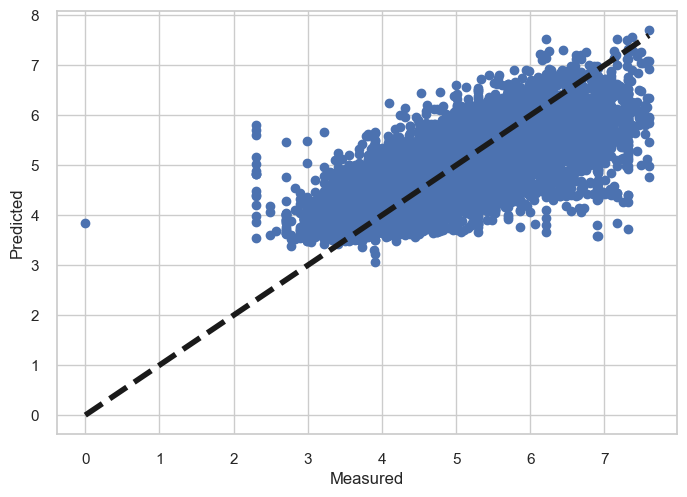

In [401]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X_train, y_train, cv=10)
fig, ax = plt.subplots()
ax.scatter(y_train, predicted)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

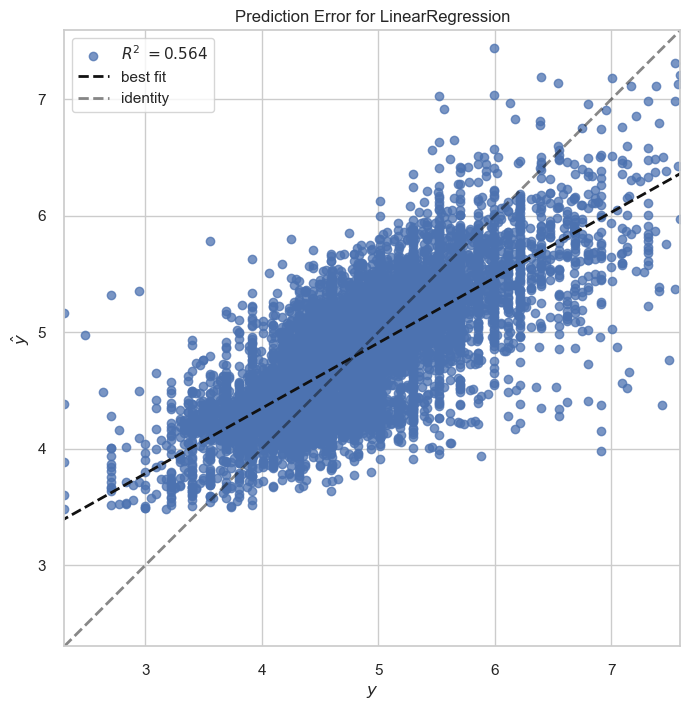

In [402]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError


# Instantiate the linear model and visualizer
visualizer = PredictionError(linreg)
plt.figure(figsize=(10,8))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(outpath="img/errors_linear.png")          

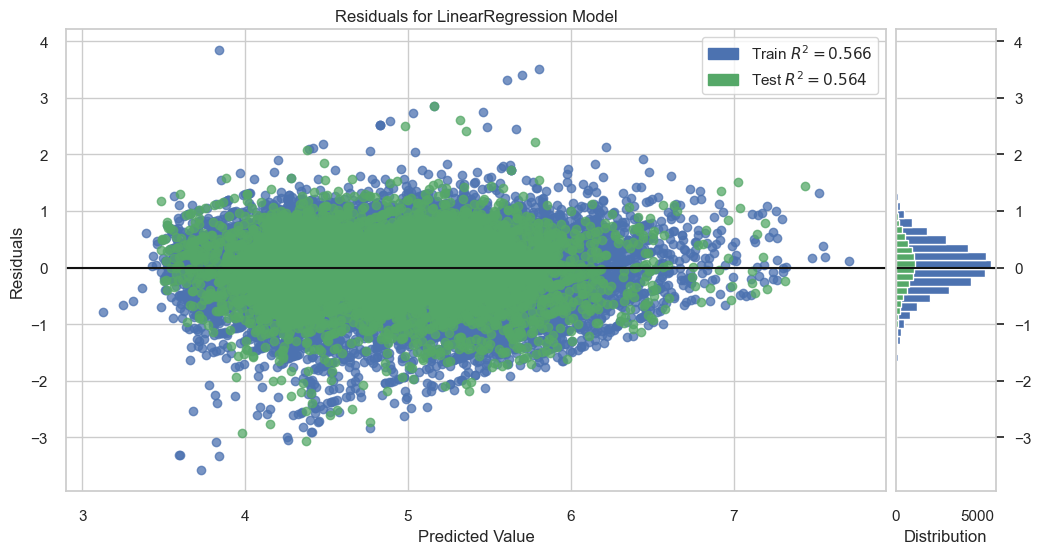

In [403]:
from yellowbrick.regressor import ResidualsPlot
plt.figure(figsize=(12,6))
visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show(outpath="img/residual_linear.png")
fig.savefig('img/residual_linear.png',  transparent=True, api=100)

## <left><span style='color:orange'>Ridge Regression</span></left>

In [404]:
# ridge model testing
ridgeCV=RidgeCV()
ridgeCV.fit(X_train, y_train)

y_pred_ridgeCV = ridgeCV.predict(X_test)
print("R-Square Value",r2_score(y_test,y_pred_ridgeCV))
print("\n")
print ("mean_absolute_error :",mean_absolute_error(y_test, y_pred_ridgeCV))
print("\n")
print ("mean_squared_error : ",mean_squared_error(y_test, y_pred_ridgeCV))
print("\n")
print ("root_mean_squared_error : ",mean_squared_error(y_test, y_pred_ridgeCV))

R-Square Value 0.5637962480254048


mean_absolute_error : 0.3625157940340354


mean_squared_error :  0.22716192026967702


root_mean_squared_error :  0.22716192026967702


In [405]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(ridgeCV, X_train, y_train, scoring='r2', cv=folds)
scores

array([0.57305494, 0.57376993, 0.57670053, 0.56236083, 0.549876  ,
       0.57925817, 0.54386919, 0.55696694, 0.57064896, 0.561377  ])

<AxesSubplot:title={'center':'Prediction Error for RidgeCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

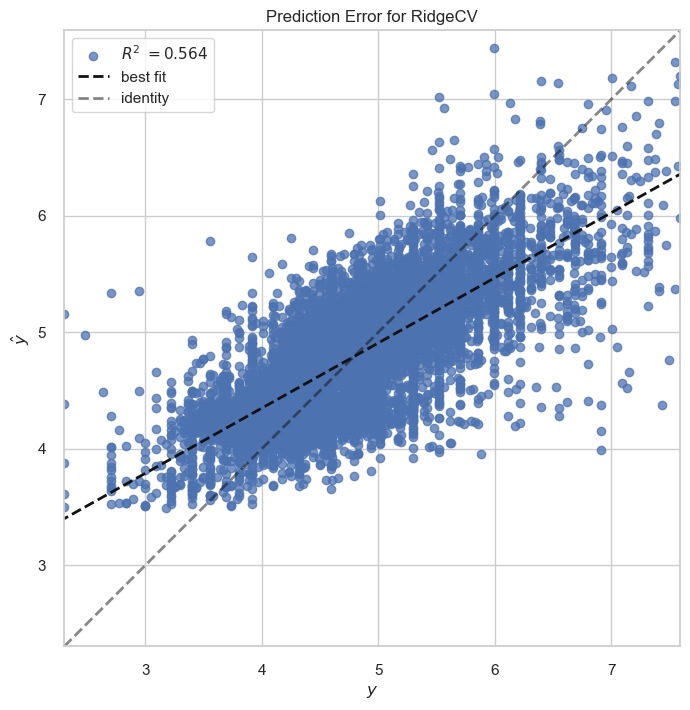

In [406]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError


# Instantiate the linear model and visualizer
visualizer = PredictionError(ridgeCV)
plt.figure(figsize=(10,8))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(outpath="img/errors_ridge.png")  

In [407]:
print('alpha : ',ridgeCV.alpha_,'\nscore : ',ridgeCV.score(X_train, y_train))

alpha :  10.0 
score :  0.5657670617593226


<AxesSubplot:>

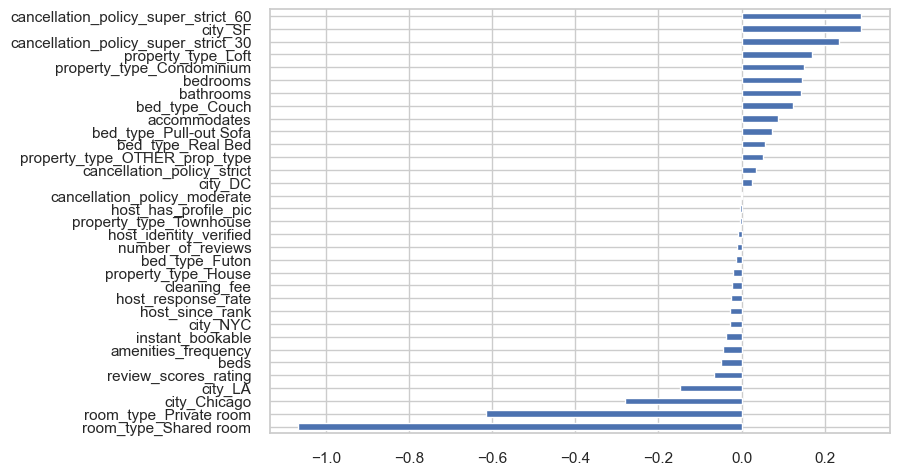

In [408]:
pd.Series(ridgeCV.coef_, index=X_train.columns).sort_values().plot.barh()

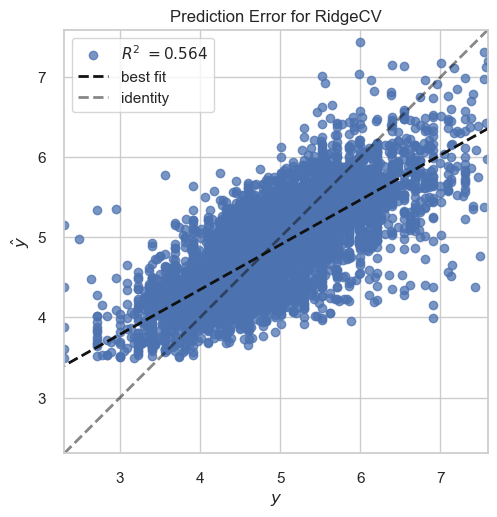

<AxesSubplot:title={'center':'Prediction Error for RidgeCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [409]:
visualizer = PredictionError(ridgeCV)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [410]:
### Taking a closer look at the estimates
est = OLS(y_train, add_constant(X_train)).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1638.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:45:54   Log-Likelihood:                -27726.
No. Observations:               41503   AIC:                         5.552e+04
Df Residuals:                   41469   BIC:                         5.581e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

## <left><span style='color:orange'>Decision Tree</span></left>

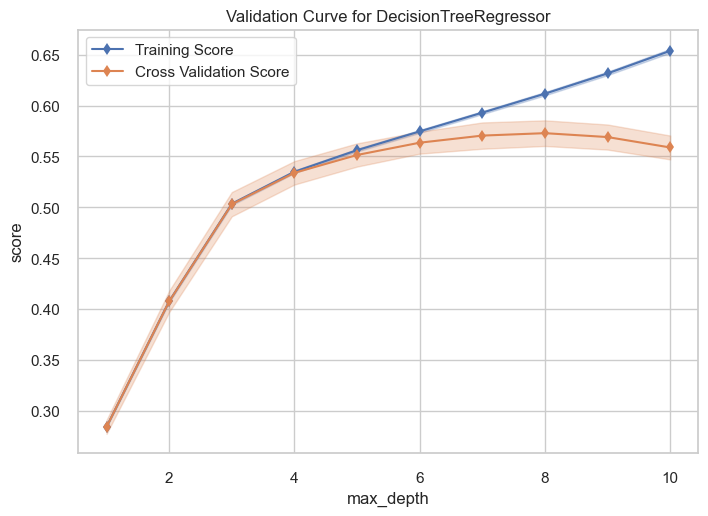

<AxesSubplot:title={'center':'Validation Curve for DecisionTreeRegressor'}, xlabel='max_depth', ylabel='score'>

In [411]:
from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import ValidationCurve

from sklearn.tree import DecisionTreeRegressor


viz = ValidationCurve(
    DecisionTreeRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X_train, y_train)
viz.show()

In [412]:
X_airbnb.shape

(51879, 33)

In [413]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

In [414]:
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
from graphviz import Source

#limiting the maximum tree depth to 6
tree_reg_vis=DecisionTreeRegressor(max_depth=6)
#refitting the train set
tree_reg_vis.fit(X_train,y_train)
graph = Source( tree.export_graphviz(tree_reg_vis, out_file=None, feature_names=X_airbnb.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

'dtree_render.png'

In [415]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(tree_reg_vis, X_train, y_train, scoring='r2', cv=folds)
scores

array([0.57448034, 0.57214981, 0.57478526, 0.55033801, 0.55195139,
       0.57184971, 0.54311868, 0.5494921 , 0.56869113, 0.57226661])

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

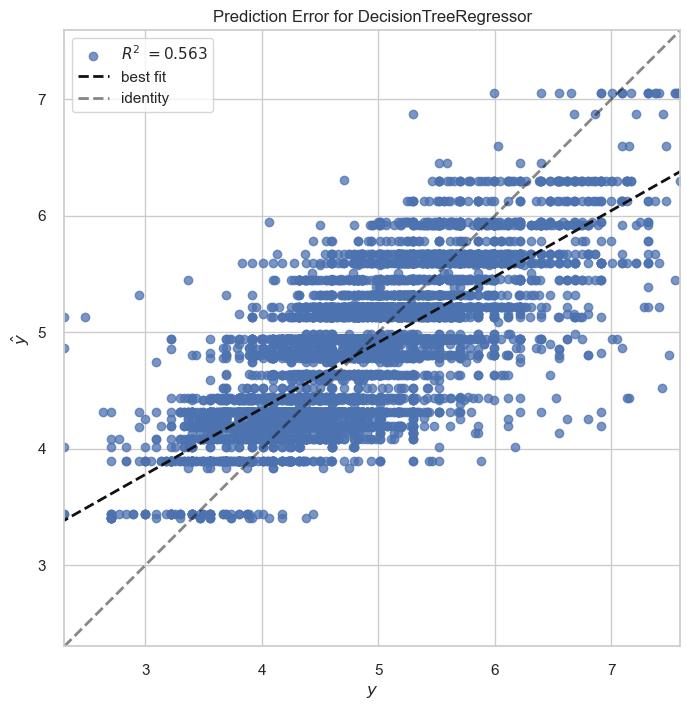

In [416]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError


# Instantiate the linear model and visualizer
visualizer = PredictionError(tree_reg_vis)
plt.figure(figsize=(10,8))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(outpath="img/errors_dtree.png")  

## <left><span style='color:orange'>Random Forest</span></left>

R sequared =  0.6096815075692539


<AxesSubplot:xlabel='feature'>

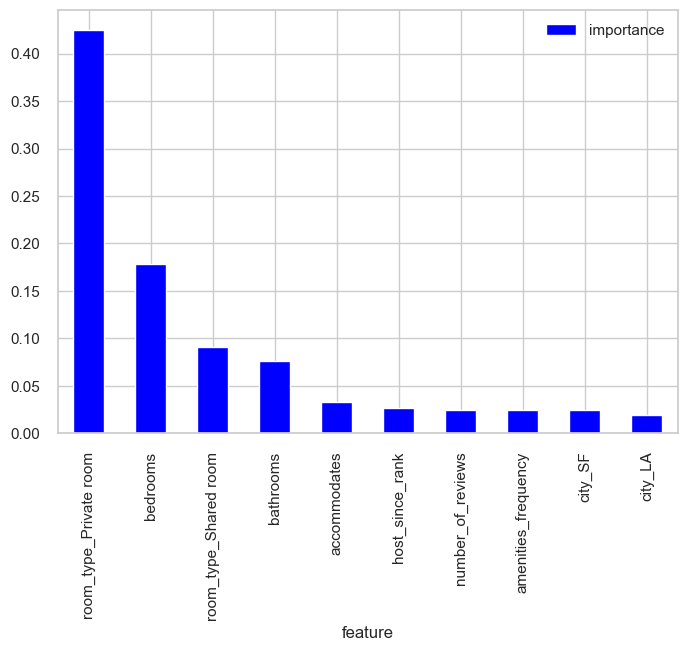

In [417]:
#Create a random forest Regressor
rfg_model = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=42)

# Fit the model on training data
rfg_model.fit(X_train, y_train)
        
# Predict results
y_pred_rf = rfg_model.predict(X_test) 

# Evaluate the result
rsquared_score = r2_score(y_test, y_pred_rf)
print('R sequared = ', rsquared_score)


#Plot variable importances for the top 10 predictors
importances = rfg_model.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})

tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar',color='blue')

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

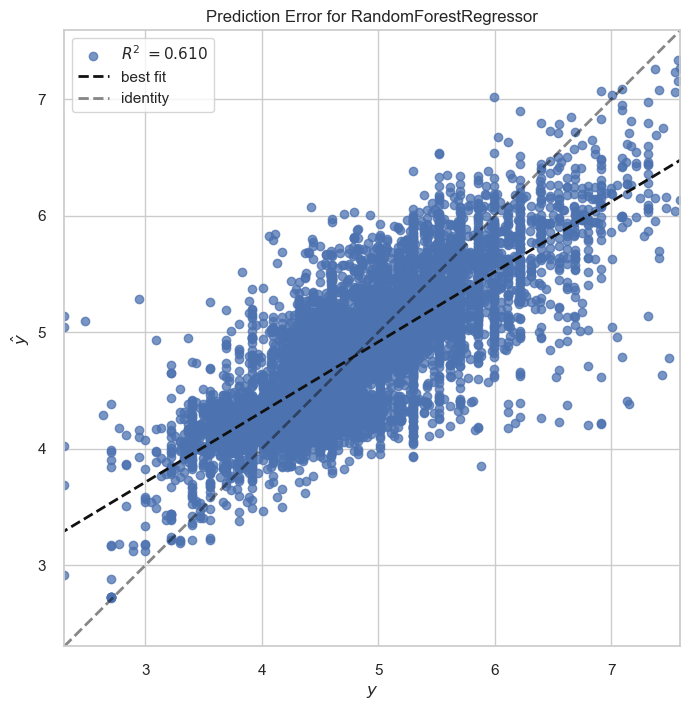

In [418]:
# Instantiate the linear model and visualizer
visualizer = PredictionError(rfg_model)
plt.figure(figsize=(10,8))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(outpath="img/errors_rfg.png")  

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

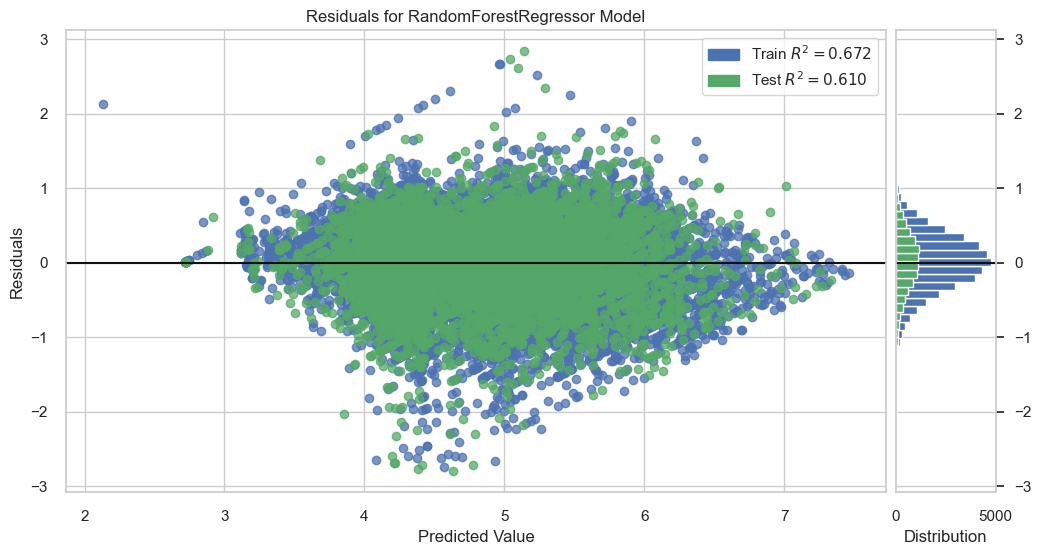

In [419]:
plt.figure(figsize=(12,6))
visualizer = ResidualsPlot(rfg_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show(outpath="img/residual_rfg_model.png")

In [420]:
sorted(zip(X_train.columns, rfg_model.feature_importances_), key=lambda x: x[1] * 1)

[('cancellation_policy_super_strict_60', 0.00017871403174974862),
 ('cancellation_policy_super_strict_30', 0.0002391554764374143),
 ('bed_type_Couch', 0.00026969345492848106),
 ('bed_type_Futon', 0.0002870984243003087),
 ('bed_type_Pull-out Sofa', 0.0004136584652850268),
 ('host_has_profile_pic', 0.0005852521004735636),
 ('bed_type_Real Bed', 0.0006562726238887233),
 ('property_type_Townhouse', 0.000710150208309867),
 ('cancellation_policy_moderate', 0.0011784452084422363),
 ('property_type_Loft', 0.0013600880074653753),
 ('property_type_Condominium', 0.0018844013166928074),
 ('instant_bookable', 0.0019702682971702514),
 ('host_identity_verified', 0.0022725952446376947),
 ('cancellation_policy_strict', 0.0023635698201262237),
 ('property_type_OTHER_prop_type', 0.0026027983132598203),
 ('cleaning_fee', 0.0037287307970324092),
 ('city_NYC', 0.004683026268377165),
 ('beds', 0.005091637108026754),
 ('property_type_House', 0.006509997227748718),
 ('city_Chicago', 0.007772325683698622),
 ('c

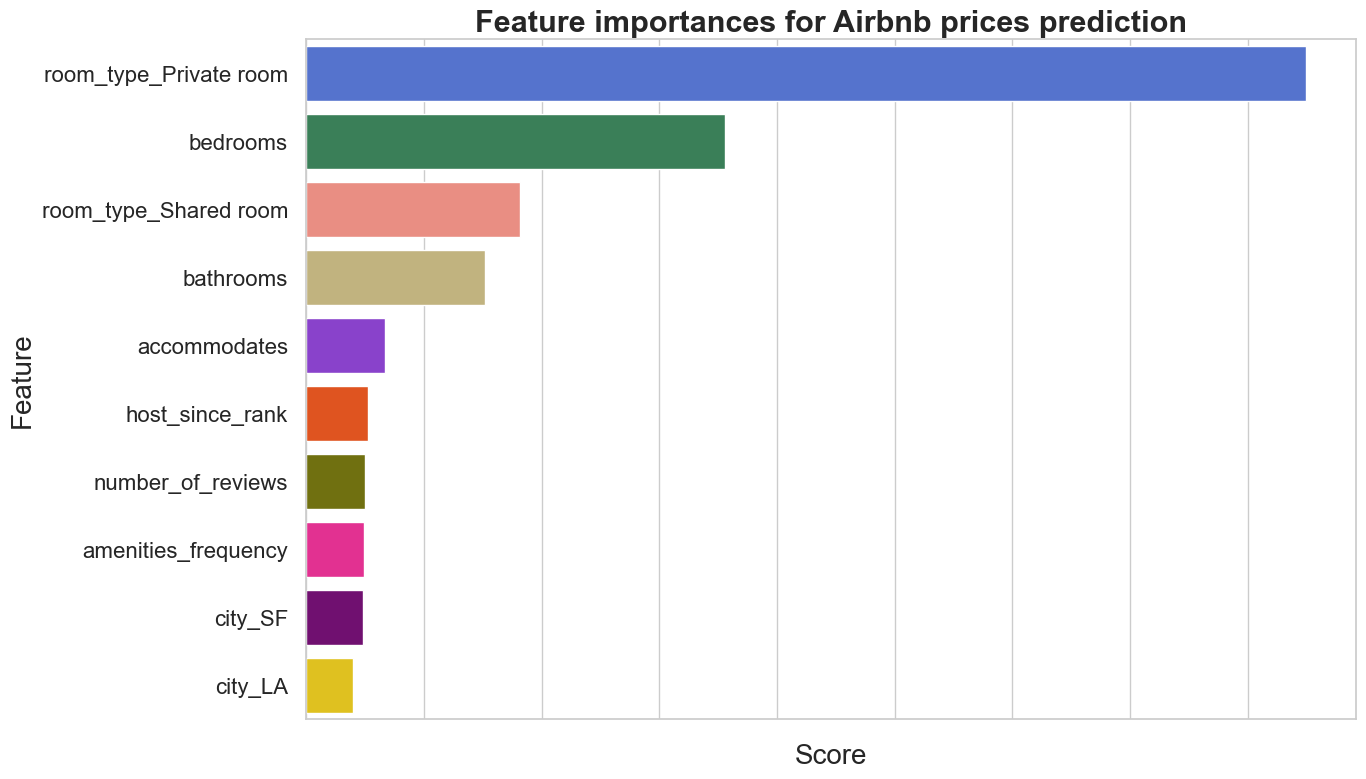

In [421]:
def feature_plot(importances, X_train, y_train):
    
    headers = ["feature", "score"]
    values = sorted(zip(X_train.columns, rfg_model.feature_importances_), key=lambda x: x[1] * 1)
    feature_importances = pd.DataFrame(values, columns = headers)
    feature_importances = feature_importances.sort_values(by = ['score'], ascending = False)

    features = feature_importances['feature'][:10]
    y_pos = np.arange(len(features))
    scores = feature_importances['score'][:10]

    #plot feature importances
    fig = plt.figure(figsize=(15,10))
    sns.set_theme()
    sns.set_style("whitegrid")
    sns.color_palette("bright")


    ax1 = sns.barplot( y = features, x = scores, palette=my_colors )
    
    ax1.set_title('Feature importances for Airbnb prices prediction',size=22, weight='bold')
    #ax1.set(xlabel='Score', ylabel='Features')
    ax1.set_xlabel("Score",fontsize=20)
    ax1.set_ylabel("Feature",fontsize=20)

    ax1.set_xticklabels(ax1.get_xmajorticklabels(), fontsize = 18)
    ax1.set_yticklabels(ax1.get_ymajorticklabels(), fontsize = 18)
    #plt.xticks(rotation = 90)
    ax1.set_yticklabels(ax1.get_ymajorticklabels(), fontsize = 16)
    plt.subplots_adjust(left=0.2, bottom=0.2)

    fig.savefig('img/features_score_2.png')

importances = rfg_model.feature_importances_
feature_plot(importances, X_train, y_train)

## <left><span style='color:orange'>Gradient Boosting</span></left>

In [422]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

In [423]:
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -0.339 (0.004)


R2 score:  60.763692767169864
RMSE:  0.452029866544509
   Actual Values  Predicted Values
0       4.605170          4.543343
1       3.401197          4.040712
2       4.672829          4.909412
3       4.605170          5.466697
4       4.499810          4.356297


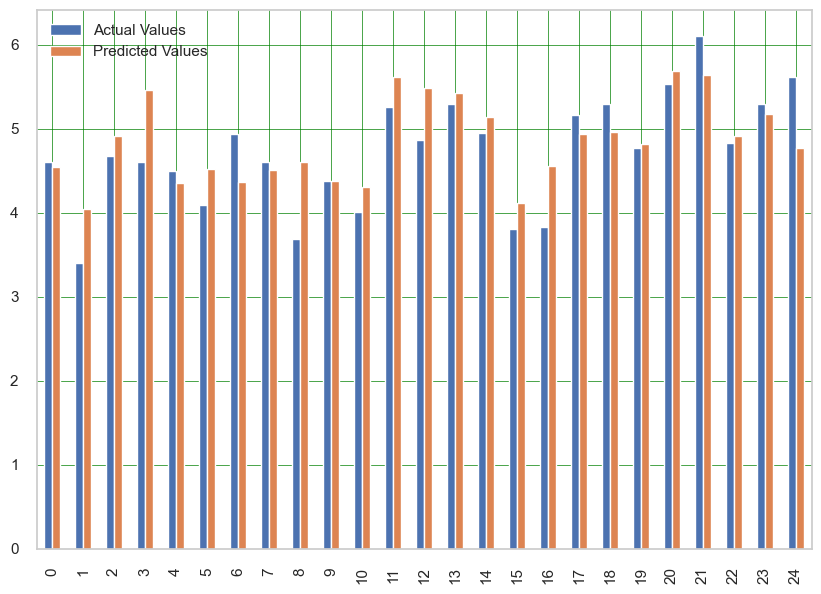

In [424]:
#Gradient Boosting Regressor
GBoost = GradientBoostingRegressor()
GBoost.fit(X_train,y_train)

y_pred_gboost=GBoost.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,y_pred_gboost)*100)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_gboost)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred_gboost.flatten()})
print(error_diff.head(5))

#Visualize the error
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [425]:
mean_squared_error(y_test,y_pred_gboost)

0.20433100024824663

<AxesSubplot:title={'center':'Prediction Error for GradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

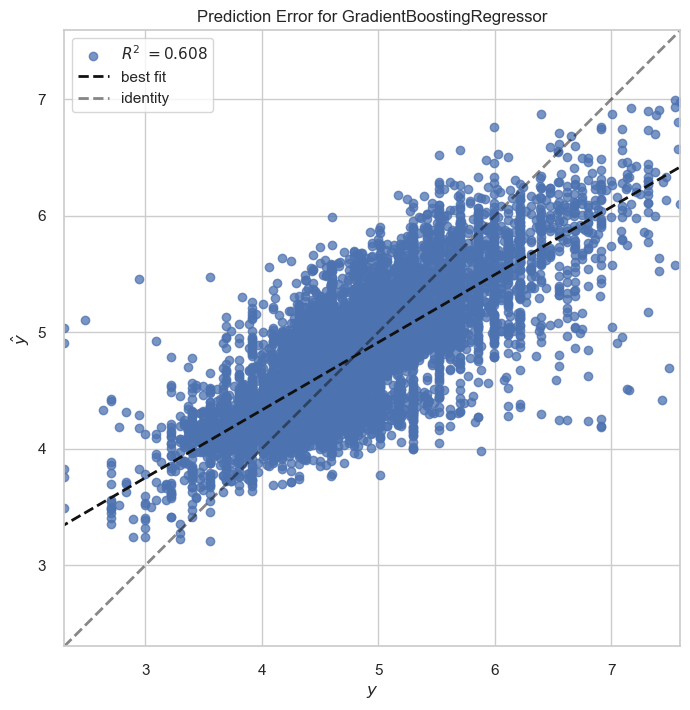

In [426]:
# Instantiate the linear model and visualizer
visualizer = PredictionError(GBoost)
plt.figure(figsize=(10,8))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(outpath="img/errors_GBoost.png")  

<AxesSubplot:title={'center':'Residuals for GradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

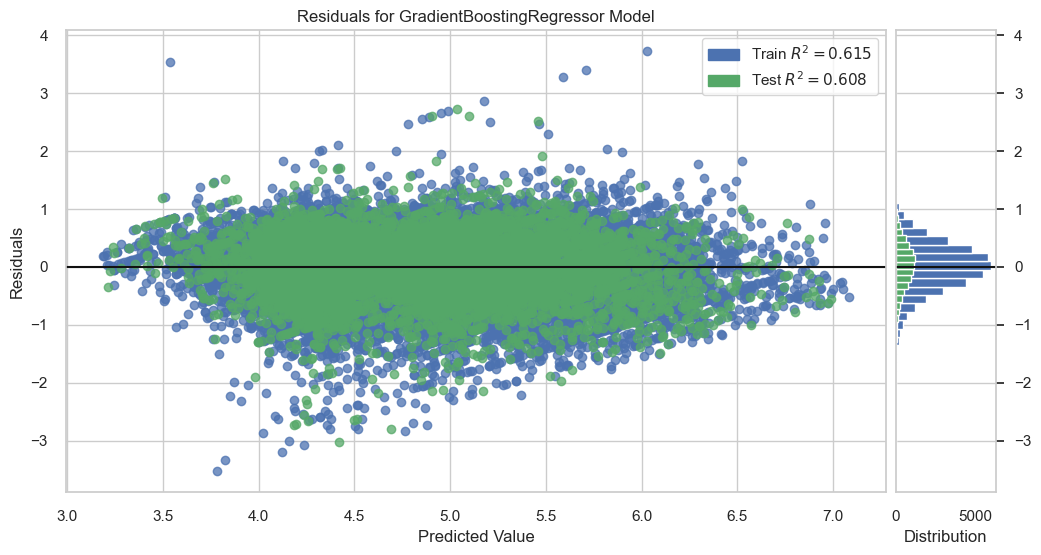

In [427]:
plt.figure(figsize=(12,6))
visualizer = ResidualsPlot(GBoost)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show(outpath="img/residual_lgboost.png")

## <left><span style='color:orange'>Principal Component Analysis</span></left>

In [428]:
pca = PCA(n_components=32, random_state=42);
pca.fit(X_airbnb)

listings_pca = pca.transform(X_airbnb)
X_train, X_test, y_train, y_test = train_test_split(listings_pca, y_airbnb, test_size=0.33, random_state=42)

rf_classifier_pca = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=42)
rf_classifier_pca.fit(X_train, y_train)

y_p_pred = rf_classifier_pca.predict(X_test)
y_p_pred_tr = rf_classifier_pca.predict(X_train)

In [429]:
import math
print(math.sqrt(mean_squared_error(y_test, y_p_pred)))
print(math.sqrt(mean_squared_error(y_train, y_p_pred_tr)))

0.4654142875599796
0.17443819389937487


In [430]:
principal_weights = pd.DataFrame(pca.components_,columns=X_airbnb.columns)
p_c_1 = principal_weights.iloc[0]
print(p_c_1.sort_values()[0:10])
print(p_c_1.sort_values()[-10:])

room_type_Private room                -0.087187
city_NYC                              -0.029368
cancellation_policy_moderate          -0.008308
room_type_Shared room                 -0.004335
bed_type_Futon                        -0.002230
bed_type_Pull-out Sofa                -0.001478
bed_type_Couch                        -0.000713
cancellation_policy_super_strict_30    0.000106
cancellation_policy_super_strict_60    0.000163
amenities_frequency                    0.000269
Name: 0, dtype: float64
number_of_reviews             0.022267
review_scores_rating          0.027850
property_type_House           0.029279
cleaning_fee                  0.033265
cancellation_policy_strict    0.042025
host_response_rate            0.066503
bathrooms                     0.128898
bedrooms                      0.259910
beds                          0.437972
accommodates                  0.839885
Name: 0, dtype: float64


## <left><span style='color:orange'>Comparison Model with K-Fold</span></left>

In [115]:
X = X_train
Y = y_train
# prepare configuration for cross validation test harness
# prepare models
models = []
models.append(('LR', LinearRegression()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RFS', RandomForestRegressor()))
models.append(('RGCV', ridgeCV))
models.append(('GRB', GradientBoostingRegressor()))
# evaluate each model in turn
results = []
names = []
scoring = 'r2'
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.562266 (0.009821)
DT: 0.179209 (0.034256)
RFS: 0.576400 (0.016575)
RGCV: 0.562154 (0.014214)
GRB: 0.579303 (0.009267)


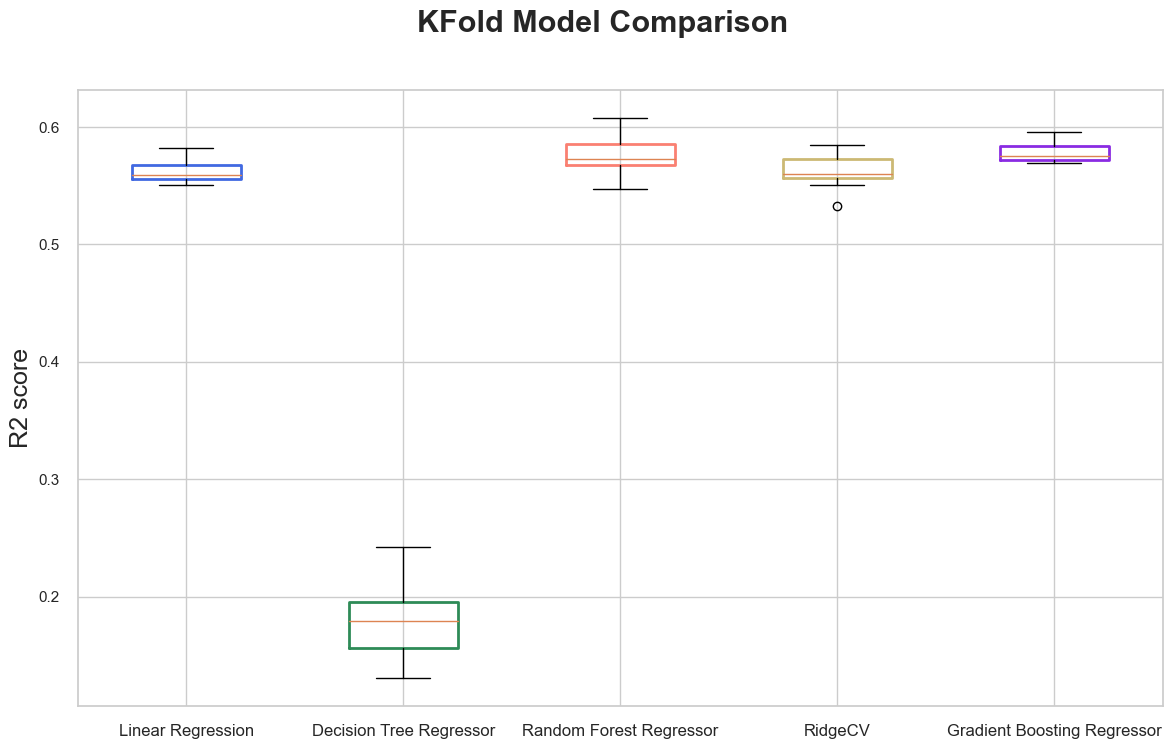

In [116]:
# boxplot algorithm comparison
names = ["Linear Regression","Decision Tree Regressor","Random Forest Regressor","RidgeCV","Gradient Boosting Regressor"]
fig = plt.figure(figsize=(14,8))
fig.suptitle('KFold Model Comparison',size=22, weight='bold')
ax = fig.add_subplot(111)
bp = plt.boxplot(results)
for i, box in enumerate(bp['boxes']):
    # change outline color
    box.set(color=my_colors[i], linewidth=2)

    
ax.set_xticklabels(names, fontsize = 12)
#plt.xticks(rotation = 40)

plt.ylabel( "R2 score" , size = 18 )
plt.show()
fig.savefig('img/model_compare.png')

Model Terbaik yaitu dengan menggunakan Gradient Boosting dengan nilai Rscore = 0.579552

# <left><span style='color:green'>VIII. Predict Data Test</span></left>

In [464]:
X_test_eval = test_df_dummy

In [465]:
X_test.shape

(17121, 32)

In [466]:
X_test_eval.shape

(22232, 33)

In [479]:
preds=rfg_model.predict(X_test_eval)

In [480]:
print(preds.shape)

(22232,)


In [481]:
submission=pd.DataFrame({'predictions':preds})

In [482]:
submission

,predictions
0,5.276057
1,5.377809
2,5.343579
3,4.805974
4,4.741533
...,...
22227,4.389455
22228,5.096841
22229,4.415570
22230,4.409719


In [483]:
submission.to_csv('data/sample_submission.csv')

<AxesSubplot:>

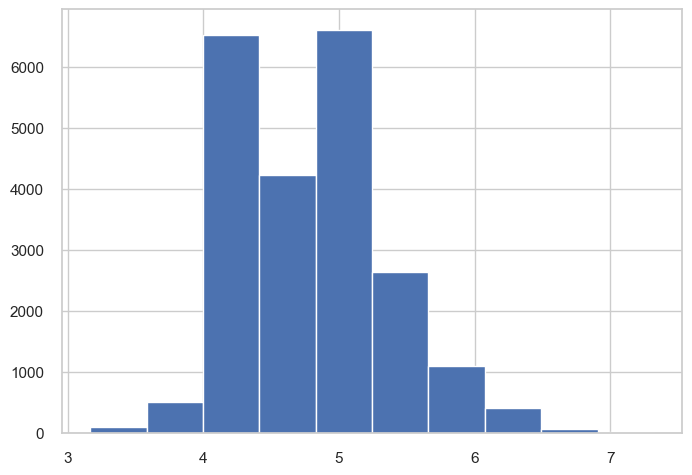

In [484]:
submission.predictions.hist()